**Table of contents**<a id='toc0_'></a>    
- [Notebook purpose](#toc1_1_)    
  - [Summary:](#toc1_2_)    
  - [Statistics of available data for each participant per block, per stimulus](#toc1_3_)    
    - [Participant 200](#toc1_3_1_)    
    - [Participant 201](#toc1_3_2_)    
    - [Participant 202](#toc1_3_3_)    
    - [Participant 204](#toc1_3_4_)    
    - [Participant 205](#toc1_3_5_)    
    - [Participant 206](#toc1_3_6_)    
    - [Participant 207](#toc1_3_7_)    
    - [Participant 209](#toc1_3_8_)    
    - [Participant 210](#toc1_3_9_)    
    - [Participant 211](#toc1_3_10_)    
    - [Participant 212](#toc1_3_11_)    
    - [Participant 213](#toc1_3_12_)    
  - [Analysis of data resampled to 25 Hz](#toc1_4_)    
    - [Participant 200](#toc1_4_1_)    
    - [Participant 201](#toc1_4_2_)    
    - [Participant 202](#toc1_4_3_)    
    - [Participant 204](#toc1_4_4_)    
    - [Participant 205](#toc1_4_5_)    
    - [Participant 206](#toc1_4_6_)    
    - [Participant 207](#toc1_4_7_)    
    - [Participant 209](#toc1_4_8_)    
    - [Participant 210](#toc1_4_9_)    
    - [Participant 211](#toc1_4_10_)    
    - [Participant 212](#toc1_4_11_)    
    - [Participant 213](#toc1_4_12_)    
- [Histograms of NaN sequence durations](#toc2_)    
- [Histograms of NaN sequence durations for data resampled to 25 Hz](#toc3_)    
- [Amount of trials remaining depending on data percentage acceptance threshold](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Notebook purpose](#toc0_)

This is a notebook calculating statistics for trials and blocks per participant regarding the amount of data available for analysis from the stimulated eye measurement.

## <a id='toc1_2_'></a>[Summary:](#toc0_)

I did statistics per block, per condition for two types of datasets:

1. All NaNs removed, resampled to 50 Hz
2. All NaNs removed, resampled to 25 Hz.

Following conclusions are based on number 1.

Global conclusion: if data is missing, it's often missing in the whole block to a similar level. Participants 204, 205, 207, 209, 210 have the most missing data. 

Analysis in current state should be possible without larger issues for 200, 201, 202, 211, 212, especially if data were to be downsampled more (e.g. to 25 - 30 Hz), as they have 50% of data or more available in each block for at least 3 trials per condition. For 206, block 1 may need to be excluded.

Here I list blocks per participant that have data completeness issues with short commentary based on statistics for 50 Hz resampled data.
Block defined as having issues when: less than 3 trials per condition have more than 50% not-nan samples.

Participant 200: all good.

Participant 201: block 0.

Participant 202: all good.

Participant 204: blocks 0, 5, 6, 8, 9.

Participant 205: blocks: all.

Participant 206: block 1.

Participant 207: blocks 2,4,5,8,10.

Participant 209: all blocks apart from 5 and 8.

Participant 210: all apart from 0 and 2.

Participant 211: all good.

Participant 212: all good.

Participant 213: blocks 3,6,7,8,10.


In [59]:
import sys

sys.path.insert(
    1, "..\\utilities\\"
)  # adds utilities folder to path so we can import modules from it, won't be needed after packaging

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import loading_utils as load
import data_utils

participant_list = [200, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213]

In [60]:
# This is a block for making participant dataframes from raw files in directory data_dir (here Windows path to retinawise mirror folder on drive)
# It saves the participant dfs into directory defined in save_path (about 300 - 400 MB per participant), format 2xx_recording_data.csv
# Uncomment and run if you don't have these dataframes (remember that the folder specified in save_path must exist)
# data_dir = "D:/retinawise_mirror/raw/"
# save_path = './results/'
# for participant_id in participant_list:
#     data_df, protocol_timecourse_df, protocol_vars_df = load.load_participant_data(participant_no=participant_id,
#                                                                                    data_dir=data_dir,
#                                                                                    include_failed=False,
#                                                                                    save=True,
#                                                                                    save_path=save_path)

In [61]:
# This is a block for resampling participant dataframes to 50 Hz and extracting only trials -1:18 s
# It loads the participant dfs from data_dir (e.g. the save_path from block above)
# And saves into directory save_path with format 2xxdata_suffix
# Uncomment and run if you don't have the resampled dataframes (remember the folder specified in save_path must exist)
# data_dir = "./results/"
# save_path = './results/resampled/'
# data_suffix = "_nonan_50_resampled_data.csv"
# for participant_id in participant_list:
#     data_path = os.path.join(data_dir,str(participant_id)+'_recording_data.csv')
#     data_df = pd.read_csv(data_path)
#     resampled_df = data_utils.resample_by_trial(data_df,sample_freq=50)
#     save_filepath = os.path.join(save_path,str(participant_id)+data_suffix)
#     resampled_df.to_csv(save_filepath)
#     data_df = []
#     resampled_df = []
    

In [62]:
# This is a block for resampling participant dataframes to 25 Hz and extracting only trials -1:18 s
# It loads the participant dfs from data_dir (e.g. the save_path from block above)
# And saves into directory save_path with format 2xxdata_suffix
# Uncomment and run if you don't have the resampled dataframes (remember the folder specified in save_path must exist)
# data_dir = "./results/"
# save_path = './results/resampled/'
# data_suffix = "_nonan_25_resampled_data.csv"
# for participant_id in participant_list:
#     data_path = os.path.join(data_dir,str(participant_id)+'_recording_data.csv')
#     data_df = pd.read_csv(data_path)
#     resampled_df = data_utils.resample_by_trial(data_df,sample_freq=25)
#     save_filepath = os.path.join(save_path,str(participant_id)+data_suffix)
#     resampled_df.to_csv(save_filepath)
#     data_df = []
#     resampled_df = []

In [ ]:
data_dir = "./results/resampled/" #directory with resampled data 
data_suffix = "_nonan_50_resampled_data.csv" #name of file with 50 Hz resampled data from participant 2xx, name format: 2xxdata_suffix

stim_stats_dict = {}
for participant_id in participant_list:
    data_path = os.path.join(data_dir, str(participant_id) + data_suffix)
    data_df_new = pd.read_csv(data_path)

    #now for only stimulus phase and baseline
    
    data_df_new = data_df_new[data_df_new['Trial phase']!='post-stim']
    groupby_df = (
        data_df_new[
            ["Block", "Trial no", "Trial type", "Stim eye - Size Mm"]
        ]
        .groupby(["Block", "Trial no", "Trial type"])
        .agg(["count", "size"])
        .reset_index()
    )
    groupby_df[("Stim eye - Size Mm", "count/size ratio")] = (
        groupby_df[("Stim eye - Size Mm", "count")]
        / groupby_df[("Stim eye - Size Mm", "size")]
    )
    groupby_df[("Stim eye - Size Mm", "more than 50%")] = (
        groupby_df[("Stim eye - Size Mm", "count/size ratio")] >= 0.5
    )
    stim_stats_dict[str(participant_id)] = (
        groupby_df[
            [
                ("Block", ""),
                ("Trial no", ""),
                ("Trial type", ""),
                ("Stim eye - Size Mm", "count/size ratio"),
                ("Stim eye - Size Mm", "more than 50%"),
            ]
        ]
        .groupby([("Block", ""), ("Trial type", "")])
        .agg(
            {
                ("Stim eye - Size Mm", "count/size ratio"): [
                    "mean",
                    "std",
                    "min",
                    "max",
                ],
                ("Stim eye - Size Mm", "more than 50%"): "sum",
                ("Trial no", ""): "count",
            }
        )
        .reset_index()
    )
    data_df_new = []
    groupby_df = []

## <a id='toc1_3_'></a>[Statistics of available data for each participant per block, per stimulus](#toc0_)

count/size ratio - number of samples without nan measurements divided by number of all samples

The above is calculated for each trial, grouped by trial type and trial phase. Then the mean, standard deviation, minimum and maximum are calculated for each group.

more than 50% - count - number of trials with count/size ratio higher or equal to 0.5

Trial no - count - overall number of trials

### <a id='toc1_3_1_'></a>[Participant 200](#toc0_)

In [64]:
print('Statistics for baseline+stimulus')
stim_stats_dict["200"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.585382  0.002621  0.581395  0.588040   
1      0        l-m           0.586047  0.002802  0.581395  0.588040   
2      0        lms           0.585382  0.002621  0.581395  0.588040   
3      0        mel           0.586047  0.002802  0.581395  0.588040   
4      0          s           0.585382  0.003431  0.581395  0.591362   
5      1       flux           0.581728  0.010901  0.551495  0.588040   
6      1        l-m           0.585714  0.002242  0.581395  0.588040   
7      1        lms           0.586711  0.002323  0.584718  0.591362   
8      1        mel           0.585714  0.002735  0.581395  0.588040   
9      1          s           0.583389  0.005002  0.571429  0.588040   
10     2       flux           0.583721  0.007354  0.564784  0.591362   
11     2        l-m           0.585714  0.002242  0.581395  0.588040   
12     2        lms           0.583056  0.003588  0.578073  0.588040   
13     2        mel           0.583056  0.007048  0.564784  0.588040   
14     2          s           0.584718  0.004430  0.574751  0.588040   
15     3       flux           0.586711  0.002323  0.581395  0.588040   
16     3        l-m           0.585382  0.004903  0.574751  0.591362   
17     3        lms           0.586379  0.002823  0.581395  0.588040   
18     3        mel           0.587043  0.001605  0.584718  0.588040   
19     3          s           0.585714  0.003519  0.578073  0.588040   
20     4       flux           0.585050  0.003977  0.578073  0.588040   
21     4        l-m           0.585050  0.002909  0.578073  0.588040   
22     4        lms           0.587375  0.002101  0.584718  0.591362   
23     4        mel           0.585382  0.003772  0.578073  0.591362   
24     4          s           0.581728  0.007744  0.561462  0.588040   
25     5       flux           0.584053  0.004084  0.578073  0.588040   
26     5        l-m           0.583056  0.008324  0.561462  0.588040   
27     5        lms           0.584053  0.007143  0.564784  0.588040   
28     5        mel           0.586379  0.004217  0.578073  0.591362   
29     5          s           0.582060  0.005147  0.571429  0.588040   
30     6       flux           0.586047  0.003210  0.578073  0.588040   
31     6        l-m           0.581728  0.009455  0.564784  0.588040   
32     6        lms           0.582392  0.009004  0.558140  0.588040   
33     6        mel           0.585382  0.005147  0.574751  0.591362   
34     6          s           0.557143  0.091923  0.295681  0.588040   
35     7       flux           0.586047  0.002323  0.581395  0.588040   
36     7        l-m           0.585050  0.002909  0.581395  0.588040   
37     7        lms           0.586711  0.002802  0.581395  0.591362   
38     7        mel           0.585714  0.002735  0.581395  0.588040   
39     7          s           0.584385  0.004553  0.574751  0.588040   
40     8       flux           0.582503  0.007499  0.558140  0.588040   
41     8        l-m           0.585604  0.003431  0.578073  0.591362   
42     8        lms           0.569878  0.063034  0.342193  0.588040   
43     8        mel           0.585161  0.003290  0.578073  0.588040   
44     8          s           0.585161  0.003522  0.578073  0.588040   
45     9       flux           0.575083  0.016459  0.544850  0.588040   
46     9        l-m           0.575748  0.015665  0.548173  0.588040   
47     9        lms           0.568106  0.025734  0.511628  0.588040   
48     9        mel           0.580731  0.012896  0.544850  0.588040   
49     9          s           0.573422  0.018741  0.541528  0.588040   
50    10       flux           0.583721  0.004711  0.574751  0.588040   
51    10        l-m           0.587043  0.002242  0.581395  0.588040   
52    10        lms           0.583721  0.0

### <a id='toc1_3_2_'></a>[Participant 201](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["201"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.544186  0.092530  0.378738  0.588040   
1      0        l-m           0.544850  0.087584  0.388704  0.588040   
2      0        lms           0.532890  0.092714  0.368771  0.588040   
3      0        mel           0.366113  0.219262  0.003322  0.548173   
4      0          s           0.548837  0.075372  0.415282  0.591362   
5      1       flux           0.571761  0.025516  0.511628  0.588040   
6      1        l-m           0.577076  0.013924  0.544850  0.591362   
7      1        lms           0.577409  0.012896  0.551495  0.584718   
8      1        mel           0.566445  0.032823  0.478405  0.588040   
9      1          s           0.576080  0.011741  0.554817  0.588040   
10     2       flux           0.583056  0.003588  0.574751  0.588040   
11     2        l-m           0.585050  0.003304  0.578073  0.588040   
12     2        lms           0.585050  0.005299  0.571429  0.588040   
13     2        mel           0.582060  0.006225  0.568106  0.588040   
14     2          s           0.584718  0.006265  0.568106  0.591362   
15     3       flux           0.586047  0.004202  0.578073  0.591362   
16     3        l-m           0.584053  0.009629  0.558140  0.588040   
17     3        lms           0.584385  0.006352  0.568106  0.591362   
18     3        mel           0.587375  0.002101  0.584718  0.591362   
19     3          s           0.583389  0.005902  0.571429  0.588040   
20     4       flux           0.581063  0.009837  0.561462  0.588040   
21     4        l-m           0.578405  0.020566  0.524917  0.591362   
22     4        lms           0.560465  0.067889  0.368771  0.588040   
23     4        mel           0.585714  0.002242  0.581395  0.588040   
24     4          s           0.569103  0.032021  0.488372  0.588040   
25     5       flux           0.505648  0.086077  0.372093  0.584718   
26     5        l-m           0.474751  0.141866  0.255814  0.591362   
27     5        lms           0.513953  0.104169  0.308970  0.588040   
28     5        mel           0.465781  0.141054  0.239203  0.588040   
29     5          s           0.519269  0.109529  0.342193  0.591362   
30     6       flux           0.585382  0.003431  0.578073  0.588040   
31     6        l-m           0.585050  0.004275  0.574751  0.588040   
32     6        lms           0.584385  0.003656  0.578073  0.588040   
33     6        mel           0.587043  0.002242  0.584718  0.591362   
34     6          s           0.587043  0.003152  0.581395  0.591362   
35     7       flux           0.568771  0.036955  0.471761  0.588040   
36     7        l-m           0.585382  0.002621  0.581395  0.588040   
37     7        lms           0.530565  0.103412  0.318937  0.588040   
38     7        mel           0.530233  0.115525  0.275748  0.588040   
39     7          s           0.509302  0.152302  0.219269  0.588040   
40     8       flux           0.584718  0.003836  0.578073  0.588040   
41     8        l-m           0.585050  0.004553  0.574751  0.591362   
42     8        lms           0.584053  0.004646  0.574751  0.591362   
43     8        mel           0.586379  0.003588  0.581395  0.591362   
44     8          s           0.586379  0.003229  0.578073  0.588040   
45     9       flux           0.586379  0.002823  0.581395  0.591362   
46     9        l-m           0.586711  0.003210  0.581395  0.591362   
47     9        lms           0.584385  0.004275  0.574751  0.588040   
48     9        mel           0.585382  0.003431  0.581395  0.591362   
49     9          s           0.586711  0.002323  0.581395  0.588040   
50    10       flux           0.584385  0.005063  0.578073  0.591362   
51    10        l-m           0.581395  0.007177  0.568106  0.588040   
52    10        lms           0.579734  0.0

### <a id='toc1_3_3_'></a>[Participant 202](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["202"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.583389  0.005470  0.571429  0.588040   
1      0        l-m           0.586379  0.003588  0.578073  0.591362   
2      0        lms           0.585382  0.005147  0.571429  0.588040   
3      0        mel           0.562791  0.057611  0.408638  0.591362   
4      0          s           0.581728  0.008783  0.564784  0.588040   
5      1       flux           0.563455  0.044302  0.455150  0.591362   
6      1        l-m           0.547841  0.067169  0.395349  0.588040   
7      1        lms           0.567110  0.046275  0.441860  0.588040   
8      1        mel           0.552824  0.104406  0.255814  0.591362   
9      1          s           0.544850  0.108425  0.239203  0.588040   
10     2       flux           0.537209  0.101001  0.259136  0.588040   
11     2        l-m           0.556146  0.060660  0.401993  0.588040   
12     2        lms           0.496346  0.146951  0.172757  0.591362   
13     2        mel           0.564452  0.045538  0.445183  0.588040   
14     2          s           0.549169  0.081725  0.335548  0.588040   
15     3       flux           0.571096  0.021895  0.524917  0.588040   
16     3        l-m           0.582724  0.015755  0.538206  0.591362   
17     3        lms           0.562126  0.033655  0.498339  0.584718   
18     3        mel           0.578073  0.015894  0.541528  0.588040   
19     3          s           0.581063  0.008205  0.561462  0.588040   
20     4       flux           0.575415  0.016261  0.541528  0.588040   
21     4        l-m           0.583721  0.005437  0.571429  0.588040   
22     4        lms           0.577409  0.012212  0.551495  0.588040   
23     4        mel           0.579734  0.014960  0.538206  0.588040   
24     4          s           0.566113  0.035582  0.498339  0.588040   
25     5       flux           0.541860  0.070327  0.368771  0.591362   
26     5        l-m           0.564452  0.047669  0.435216  0.588040   
27     5        lms           0.563123  0.029931  0.511628  0.588040   
28     5        mel           0.553156  0.043352  0.475083  0.588040   
29     5          s           0.546512  0.064388  0.425249  0.588040   
30     6       flux           0.555482  0.067084  0.372093  0.588040   
31     6        l-m           0.573754  0.024716  0.504983  0.588040   
32     6        lms           0.581395  0.006645  0.564784  0.588040   
33     6        mel           0.586379  0.002349  0.581395  0.588040   
34     6          s           0.581063  0.006352  0.568106  0.588040   
35     7       flux           0.585050  0.005299  0.571429  0.588040   
36     7        l-m           0.554485  0.055756  0.425249  0.588040   
37     7        lms           0.585382  0.004084  0.578073  0.591362   
38     7        mel           0.586379  0.005481  0.571429  0.591362   
39     7          s           0.585382  0.003431  0.578073  0.588040   
40     8       flux           0.572093  0.016336  0.544850  0.588040   
41     8        l-m           0.578073  0.020360  0.528239  0.591362   
42     8        lms           0.574751  0.022857  0.514950  0.588040   
43     8        mel           0.583056  0.007387  0.568106  0.588040   
44     8          s           0.581063  0.013052  0.554817  0.588040   
45     9       flux           0.586047  0.002323  0.581395  0.588040   
46     9        l-m           0.585714  0.002242  0.581395  0.588040   
47     9        lms           0.586711  0.003210  0.578073  0.588040   
48     9        mel           0.586711  0.003900  0.581395  0.591362   
49     9          s           0.583721  0.007993  0.561462  0.588040   
50    10       flux           0.472618  0.177642  0.033223  0.588040   
51    10        l-m           0.429734  0.194092  0.000000  0.588040   
52    10        lms           0.479840  0.1

### <a id='toc1_3_4_'></a>[Participant 204](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["204"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.291362  0.197140  0.003322  0.568106   
1      0        l-m           0.317276  0.169658  0.043189  0.531561   
2      0        lms           0.426910  0.097128  0.249169  0.561462   
3      0        mel           0.384718  0.113377  0.219269  0.564784   
4      0          s           0.363123  0.181272  0.156146  0.568106   
5      1       flux           0.522591  0.067563  0.401993  0.588040   
6      1        l-m           0.488704  0.095540  0.345515  0.588040   
7      1        lms           0.474086  0.101763  0.225914  0.574751   
8      1        mel           0.490365  0.104640  0.295681  0.588040   
9      1          s           0.479402  0.135124  0.252492  0.588040   
10     2       flux           0.483389  0.164072  0.036545  0.578073   
11     2        l-m           0.544518  0.047515  0.451827  0.591362   
12     2        lms           0.497674  0.096654  0.335548  0.584718   
13     2        mel           0.383721  0.215063  0.000000  0.588040   
14     2          s           0.504983  0.085365  0.342193  0.584718   
15     3       flux           0.486047  0.080011  0.382060  0.568106   
16     3        l-m           0.487708  0.077769  0.332226  0.571429   
17     3        lms           0.519269  0.035920  0.475083  0.571429   
18     3        mel           0.504651  0.053097  0.408638  0.568106   
19     3          s           0.524585  0.066527  0.352159  0.578073   
20     4       flux           0.471429  0.074936  0.315615  0.551495   
21     4        l-m           0.466113  0.111603  0.275748  0.588040   
22     4        lms           0.435548  0.186333  0.000000  0.554817   
23     4        mel           0.464452  0.085276  0.255814  0.571429   
24     4          s           0.495349  0.053374  0.415282  0.591362   
25     5       flux           0.410631  0.120176  0.166113  0.568106   
26     5        l-m           0.452824  0.102806  0.222591  0.544850   
27     5        lms           0.365116  0.176455  0.000000  0.554817   
28     5        mel           0.386711  0.131640  0.139535  0.551495   
29     5          s           0.466777  0.110512  0.199336  0.564784   
30     6       flux           0.400997  0.138415  0.202658  0.574751   
31     6        l-m           0.496013  0.070772  0.392027  0.584718   
32     6        lms           0.374751  0.156760  0.053156  0.514950   
33     6        mel           0.411628  0.132154  0.149502  0.551495   
34     6          s           0.410299  0.156388  0.096346  0.561462   
35     7       flux           0.237209  0.210121  0.000000  0.571429   
36     7        l-m           0.283849  0.242112  0.003322  0.574751   
37     7        lms           0.325560  0.246072  0.000000  0.554817   
38     7        mel           0.316944  0.236511  0.000000  0.548173   
39     7          s           0.310963  0.236334  0.000000  0.571429   
40     8       flux           0.436545  0.074159  0.289037  0.538206   
41     8        l-m           0.482724  0.066998  0.368771  0.574751   
42     8        lms           0.444850  0.113924  0.186047  0.578073   
43     8        mel           0.405648  0.125890  0.122924  0.524917   
44     8          s           0.509635  0.066780  0.385382  0.584718   
45     9       flux           0.410963  0.152977  0.056478  0.564784   
46     9        l-m           0.369767  0.165677  0.102990  0.588040   
47     9        lms           0.397342  0.154231  0.000000  0.531561   
48     9        mel           0.450831  0.059204  0.348837  0.558140   
49     9          s           0.389701  0.182815  0.000000  0.581395   
50    10       flux           0.545183  0.026134  0.498339  0.584718   
51    10        l-m           0.547508  0.017980  0.521595  0.581395   
52    10        lms           0.530565  0.0

### <a id='toc1_3_5_'></a>[Participant 205](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["205"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.205980  0.215165  0.000000  0.478405   
1      0        l-m           0.246179  0.218122  0.000000  0.514950   
2      0        lms           0.304420  0.173386  0.080745  0.554817   
3      0        mel           0.151081  0.149299  0.000000  0.415282   
4      0          s           0.234330  0.154598  0.000000  0.459459   
5      1       flux           0.299003  0.195478  0.019934  0.531561   
6      1        l-m           0.347176  0.137617  0.102990  0.541528   
7      1        lms           0.362126  0.233582  0.000000  0.578073   
8      1        mel           0.265412  0.217655  0.036545  0.578073   
9      1          s           0.329900  0.159438  0.069767  0.531561   
10     2       flux           0.332890  0.233247  0.000000  0.571429   
11     2        l-m           0.270949  0.128317  0.000000  0.451827   
12     2        lms           0.295192  0.167477  0.096346  0.528239   
13     2        mel           0.274419  0.136102  0.119601  0.481728   
14     2          s           0.311145  0.231227  0.000000  0.584718   
15     3       flux           0.326578  0.207061  0.000000  0.561462   
16     3        l-m           0.283721  0.206338  0.000000  0.558140   
17     3        lms           0.428571  0.114360  0.249169  0.558140   
18     3        mel           0.301329  0.189204  0.000000  0.554817   
19     3          s           0.352159  0.161623  0.000000  0.561462   
20     4       flux           0.145279  0.170294  0.000000  0.514950   
21     4        l-m           0.184883  0.156031  0.000000  0.445183   
22     4        lms           0.179142  0.126351  0.000000  0.405316   
23     4        mel           0.192706  0.140775  0.000000  0.410448   
24     4          s           0.206451  0.152855  0.063123  0.518272   
25     5       flux           0.244001  0.188244  0.053156  0.491694   
26     5        l-m           0.325510  0.139515  0.146179  0.547529   
27     5        lms           0.233555  0.188912  0.000000  0.491694   
28     5        mel           0.304983  0.166488  0.073090  0.498339   
29     5          s           0.249834  0.185358  0.000000  0.514950   
30     6       flux           0.399668  0.135233  0.139535  0.544850   
31     6        l-m           0.410631  0.162751  0.033223  0.568106   
32     6        lms           0.370764  0.188952  0.000000  0.568106   
33     6        mel           0.345183  0.200864  0.053156  0.554817   
34     6          s           0.410963  0.181218  0.029900  0.548173   
35     7       flux           0.445847  0.162509  0.156146  0.528239   
36     7        l-m           0.506312  0.033272  0.468439  0.534884   
37     7        lms           0.510299  0.022969  0.478405  0.541528   
38     7        mel           0.348173  0.152795  0.149502  0.521595   
39     7          s           0.381395  0.085039  0.305648  0.488372   
40     8       flux           0.453821  0.147517  0.056478  0.578073   
41     8        l-m           0.384385  0.066888  0.265781  0.461794   
42     8        lms           0.479734  0.069780  0.358804  0.568106   
43     8        mel           0.431561  0.099365  0.232558  0.544850   
44     8          s           0.429236  0.083444  0.285714  0.548173   
45     9       flux           0.355113  0.176803  0.083056  0.544850   
46     9        l-m           0.323920  0.153586  0.102990  0.551495   
47     9        lms           0.361462  0.159897  0.000000  0.554817   
48     9        mel           0.374086  0.118024  0.235880  0.584718   
49     9          s           0.332558  0.137556  0.116279  0.544850   
50    10       flux           0.361515  0.197894  0.033223  0.571429   
51    10        l-m           0.319601  0.179223  0.000000  0.534884   
52    10        lms           0.385262  0.2

### <a id='toc1_3_6_'></a>[Participant 206](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["206"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.566777  0.021256  0.521595  0.588040   
1      0        l-m           0.547508  0.060124  0.395349  0.584718   
2      0        lms           0.552824  0.026122  0.508306  0.584718   
3      0        mel           0.563123  0.018547  0.521595  0.588040   
4      0          s           0.533887  0.102866  0.249169  0.588040   
5      1       flux           0.119269  0.244449  0.003322  0.588040   
6      1        l-m           0.061462  0.183860  0.000000  0.584718   
7      1        lms           0.120266  0.246544  0.003322  0.591362   
8      1        mel           0.177409  0.280307  0.003322  0.584718   
9      1          s           0.118937  0.242875  0.003322  0.584718   
10     2       flux           0.573754  0.019248  0.524917  0.588040   
11     2        l-m           0.573422  0.024524  0.508306  0.588040   
12     2        lms           0.573090  0.015204  0.544850  0.588040   
13     2        mel           0.554817  0.062272  0.378738  0.584718   
14     2          s           0.559801  0.055884  0.401993  0.588040   
15     3       flux           0.521262  0.089618  0.322259  0.584718   
16     3        l-m           0.466445  0.142347  0.186047  0.588040   
17     3        lms           0.500997  0.129277  0.215947  0.581395   
18     3        mel           0.534219  0.050864  0.421927  0.581395   
19     3          s           0.455150  0.199009  0.026578  0.578073   
20     4       flux           0.527575  0.110418  0.219269  0.584718   
21     4        l-m           0.571761  0.015460  0.541528  0.584718   
22     4        lms           0.558804  0.027566  0.495017  0.581395   
23     4        mel           0.560465  0.022426  0.514950  0.588040   
24     4          s           0.569435  0.022489  0.518272  0.588040   
25     5       flux           0.489369  0.108109  0.235880  0.581395   
26     5        l-m           0.486379  0.095831  0.255814  0.578073   
27     5        lms           0.549834  0.027228  0.491694  0.574751   
28     5        mel           0.533555  0.042146  0.448505  0.584718   
29     5          s           0.500997  0.055367  0.421927  0.574751   
30     6       flux           0.505980  0.112479  0.205980  0.581395   
31     6        l-m           0.534219  0.062268  0.372093  0.581395   
32     6        lms           0.491030  0.096743  0.255814  0.578073   
33     6        mel           0.479070  0.101760  0.305648  0.588040   
34     6          s           0.506312  0.083155  0.345515  0.574751   
35     7       flux           0.457475  0.183672  0.053156  0.588040   
36     7        l-m           0.505980  0.099718  0.342193  0.588040   
37     7        lms           0.465449  0.205070  0.000000  0.584718   
38     7        mel           0.419269  0.150453  0.172757  0.581395   
39     7          s           0.506977  0.115980  0.249169  0.588040   
40     8       flux           0.562791  0.024921  0.501661  0.588040   
41     8        l-m           0.554817  0.023440  0.521595  0.591362   
42     8        lms           0.547508  0.044896  0.428571  0.584718   
43     8        mel           0.570764  0.022630  0.508306  0.584718   
44     8          s           0.550166  0.048251  0.435216  0.588040   
45     9       flux           0.561130  0.046603  0.468439  0.588040   
46     9        l-m           0.575748  0.016725  0.534884  0.588040   
47     9        lms           0.585050  0.003304  0.578073  0.588040   
48     9        mel           0.577741  0.020023  0.521595  0.588040   
49     9          s           0.581728  0.005526  0.571429  0.588040   
50    10       flux           0.574086  0.017284  0.544850  0.588040   
51    10        l-m           0.563123  0.030938  0.504983  0.588040   
52    10        lms           0.567110  0.0

### <a id='toc1_3_7_'></a>[Participant 207](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["207"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.502658  0.100733  0.235880  0.584718   
1      0        l-m           0.538870  0.045628  0.458472  0.581395   
2      0        lms           0.505980  0.101497  0.285714  0.588040   
3      0        mel           0.504319  0.148161  0.093023  0.588040   
4      0          s           0.527575  0.079992  0.325581  0.584718   
5      1       flux           0.534884  0.024960  0.491694  0.578073   
6      1        l-m           0.549169  0.020898  0.518272  0.574751   
7      1        lms           0.545183  0.023723  0.504983  0.574751   
8      1        mel           0.529900  0.032485  0.485050  0.571429   
9      1          s           0.561462  0.020420  0.508306  0.584718   
10     2       flux           0.342931  0.186689  0.000000  0.531561   
11     2        l-m           0.505648  0.068495  0.355482  0.564784   
12     2        lms           0.447176  0.112937  0.255814  0.588040   
13     2        mel           0.472868  0.072521  0.318937  0.571429   
14     2          s           0.399336  0.166973  0.083056  0.564784   
15     3       flux           0.402658  0.152300  0.116279  0.588040   
16     3        l-m           0.396013  0.144354  0.089701  0.548173   
17     3        lms           0.407641  0.137419  0.186047  0.588040   
18     3        mel           0.373090  0.165855  0.000000  0.564784   
19     3          s           0.485050  0.044738  0.418605  0.541528   
20     4       flux           0.162673  0.076468  0.026578  0.244792   
21     4        l-m           0.253156  0.185372  0.000000  0.495017   
22     4        lms           0.226246  0.159179  0.000000  0.448505   
23     4        mel           0.148426  0.138947  0.000000  0.408922   
24     4          s           0.166113  0.195998  0.000000  0.564784   
25     5       flux           0.401028  0.106216  0.162791  0.528239   
26     5        l-m           0.332890  0.194451  0.073090  0.584718   
27     5        lms           0.308232  0.171377  0.023256  0.521595   
28     5        mel           0.340864  0.141596  0.026578  0.554817   
29     5          s           0.261203  0.222323  0.000000  0.555556   
30     6       flux           0.452492  0.134603  0.202658  0.558140   
31     6        l-m           0.437542  0.160381  0.136213  0.578073   
32     6        lms           0.394684  0.150754  0.192691  0.558140   
33     6        mel           0.409635  0.158327  0.102990  0.581395   
34     6          s           0.472757  0.091079  0.318937  0.564784   
35     7       flux           0.423460  0.174060  0.043189  0.568106   
36     7        l-m           0.468201  0.126276  0.089701  0.588040   
37     7        lms           0.426527  0.099062  0.285714  0.568106   
38     7        mel           0.405963  0.129494  0.166113  0.578073   
39     7          s           0.415282  0.186584  0.053156  0.588040   
40     8       flux           0.450831  0.099521  0.239203  0.554817   
41     8        l-m           0.440532  0.168984  0.196013  0.581395   
42     8        lms           0.420930  0.199059  0.000000  0.571429   
43     8        mel           0.410963  0.128031  0.172757  0.541528   
44     8          s           0.390365  0.235468  0.000000  0.574751   
45     9       flux           0.431775  0.189538  0.000000  0.561462   
46     9        l-m           0.537542  0.035431  0.445183  0.564784   
47     9        lms           0.417608  0.181455  0.000000  0.551495   
48     9        mel           0.488040  0.098535  0.229236  0.568106   
49     9          s           0.428904  0.197658  0.046512  0.584718   
50    10       flux           0.382060  0.138883  0.116279  0.571429   
51    10        l-m           0.409302  0.125200  0.209302  0.544850   
52    10        lms           0.298339  0.1

### <a id='toc1_3_8_'></a>[Participant 209](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["209"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.283805  0.145363  0.056478  0.574751   
1      0        l-m           0.238464  0.188125  0.000000  0.498339   
2      0        lms           0.133260  0.127631  0.000000  0.372093   
3      0        mel           0.240642  0.124794  0.053156  0.451827   
4      0          s           0.194168  0.201244  0.000000  0.518272   
5      1       flux           0.251393  0.159073  0.039867  0.571429   
6      1        l-m           0.230786  0.183881  0.000000  0.548173   
7      1        lms           0.276222  0.163220  0.000000  0.528239   
8      1        mel           0.285952  0.203732  0.000000  0.591362   
9      1          s           0.258899  0.201481  0.000000  0.584718   
10     2       flux           0.347176  0.149803  0.093023  0.574751   
11     2        l-m           0.400664  0.156489  0.162791  0.578073   
12     2        lms           0.318937  0.206283  0.000000  0.534884   
13     2        mel           0.322944  0.201492  0.000000  0.564784   
14     2          s           0.327193  0.178427  0.046512  0.581395   
15     3       flux           0.192027  0.197101  0.000000  0.478405   
16     3        l-m           0.104836  0.180873  0.000000  0.538206   
17     3        lms           0.196752  0.183454  0.000000  0.498339   
18     3        mel           0.305992  0.197803  0.029900  0.564784   
19     3          s           0.183056  0.156890  0.000000  0.411960   
20     4       flux           0.257291  0.238140  0.000000  0.568106   
21     4        l-m           0.312981  0.183756  0.000000  0.518272   
22     4        lms           0.275748  0.212965  0.000000  0.588040   
23     4        mel           0.241787  0.163836  0.056478  0.571429   
24     4          s           0.265781  0.177632  0.000000  0.558140   
25     5       flux           0.491030  0.076304  0.302326  0.558140   
26     5        l-m           0.532226  0.032393  0.475083  0.561462   
27     5        lms           0.504983  0.048777  0.405316  0.568106   
28     5        mel           0.507309  0.067472  0.328904  0.574751   
29     5          s           0.491362  0.068489  0.372093  0.588040   
30     6       flux           0.067110  0.088879  0.000000  0.219269   
31     6        l-m           0.098684  0.200265  0.000000  0.541284   
32     6        lms           0.104651  0.131046  0.000000  0.289037   
33     6        mel           0.190698  0.174040  0.000000  0.465116   
34     6          s           0.144186  0.136164  0.000000  0.322259   
35     7       flux           0.129310  0.081929  0.043189  0.206278   
36     7        l-m           0.140351  0.243095  0.000000  0.421053   
37     7        lms           0.056478  0.079873  0.000000  0.112957   
38     7        mel           0.013289  0.023017  0.000000  0.039867   
39     7          s           0.075748  0.112918  0.000000  0.252492   
40     8       flux           0.352159  0.209779  0.039867  0.591362   
41     8        l-m           0.424585  0.174240  0.106312  0.564784   
42     8        lms           0.421595  0.165584  0.142857  0.584718   
43     8        mel           0.429568  0.127532  0.225914  0.581395   
44     8          s           0.381063  0.184431  0.000000  0.531561   
45     9       flux           0.314618  0.106036  0.142857  0.475083   
46     9        l-m           0.333555  0.174567  0.069767  0.574751   
47     9        lms           0.362126  0.161463  0.076412  0.554817   
48     9        mel           0.399336  0.224229  0.000000  0.581395   
49     9          s           0.436545  0.132272  0.116279  0.581395   
50    10       flux           0.399003  0.144249  0.089701  0.548173   
51    10        l-m           0.346179  0.122166  0.089701  0.501661   
52    10        lms           0.313953  0.2

### <a id='toc1_3_9_'></a>[Participant 210](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["210"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.513953  0.098989  0.282392  0.588040   
1      0        l-m           0.482724  0.060576  0.368771  0.551495   
2      0        lms           0.519601  0.069002  0.342193  0.588040   
3      0        mel           0.503654  0.047894  0.411960  0.568106   
4      0          s           0.495017  0.045579  0.398671  0.564784   
5      1       flux           0.324585  0.196286  0.059801  0.534884   
6      1        l-m           0.348173  0.200347  0.000000  0.581395   
7      1        lms           0.322924  0.156705  0.089701  0.498339   
8      1        mel           0.372757  0.147006  0.053156  0.574751   
9      1          s           0.417608  0.127945  0.215947  0.574751   
10     2       flux           0.458140  0.102152  0.245847  0.534884   
11     2        l-m           0.527243  0.051422  0.438538  0.584718   
12     2        lms           0.502658  0.044243  0.401993  0.578073   
13     2        mel           0.428571  0.097955  0.299003  0.551495   
14     2          s           0.492027  0.035694  0.418605  0.558140   
15     3       flux           0.393355  0.152930  0.192691  0.581395   
16     3        l-m           0.435216  0.128356  0.149502  0.558140   
17     3        lms           0.348837  0.210852  0.000000  0.568106   
18     3        mel           0.416895  0.160808  0.172757  0.584718   
19     3          s           0.341860  0.127401  0.102990  0.551495   
20     4       flux           0.305316  0.145012  0.066445  0.534884   
21     4        l-m           0.411296  0.124187  0.152824  0.548173   
22     4        lms           0.354817  0.195765  0.046512  0.584718   
23     4        mel           0.316279  0.135611  0.000000  0.448505   
24     4          s           0.318937  0.125163  0.039867  0.471761   
25     5       flux           0.302990  0.202266  0.049834  0.578073   
26     5        l-m           0.383056  0.176376  0.169435  0.588040   
27     5        lms           0.276412  0.223977  0.000000  0.584718   
28     5        mel           0.287053  0.211030  0.000000  0.588040   
29     5          s           0.334551  0.228000  0.003322  0.584718   
30     6       flux           0.342193  0.129649  0.069767  0.534884   
31     6        l-m           0.480731  0.077662  0.368771  0.588040   
32     6        lms           0.444518  0.151824  0.142857  0.581395   
33     6        mel           0.400332  0.069886  0.292359  0.524917   
34     6          s           0.391030  0.103270  0.212625  0.571429   
35     7       flux           0.269767  0.148888  0.026578  0.455150   
36     7        l-m           0.362791  0.101675  0.229236  0.548173   
37     7        lms           0.336877  0.126752  0.136213  0.481728   
38     7        mel           0.342525  0.154034  0.099668  0.574751   
39     7          s           0.336877  0.102473  0.205980  0.504983   
40     8       flux           0.295017  0.169307  0.036545  0.574751   
41     8        l-m           0.380066  0.100747  0.229236  0.544850   
42     8        lms           0.362126  0.146575  0.119601  0.528239   
43     8        mel           0.255482  0.177550  0.000000  0.538206   
44     8          s           0.309967  0.150398  0.083056  0.574751   
45     9       flux           0.341528  0.176749  0.096346  0.574751   
46     9        l-m           0.495681  0.065231  0.421927  0.584718   
47     9        lms           0.356478  0.159592  0.003322  0.564784   
48     9        mel           0.408970  0.124085  0.172757  0.568106   
49     9          s           0.454485  0.121754  0.292359  0.588040   
50    10       flux           0.286379  0.194394  0.000000  0.581395   
51    10        l-m           0.428239  0.103820  0.259136  0.578073   
52    10        lms           0.180879  0.1

### <a id='toc1_3_10_'></a>[Participant 211](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["211"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.539535  0.038176  0.485050  0.588040   
1      0        l-m           0.571761  0.018428  0.541528  0.588040   
2      0        lms           0.573754  0.025497  0.504983  0.588040   
3      0        mel           0.549502  0.052042  0.418605  0.584718   
4      0          s           0.537209  0.029758  0.478405  0.571429   
5      1       flux           0.435216  0.203524  0.029900  0.588040   
6      1        l-m           0.481395  0.117516  0.232558  0.588040   
7      1        lms           0.455150  0.187681  0.000000  0.588040   
8      1        mel           0.403322  0.222849  0.033223  0.584718   
9      1          s           0.517276  0.090633  0.345515  0.588040   
10     2       flux           0.570100  0.019511  0.521595  0.588040   
11     2        l-m           0.578405  0.008055  0.564784  0.588040   
12     2        lms           0.561462  0.027530  0.498339  0.588040   
13     2        mel           0.573090  0.016444  0.541528  0.588040   
14     2          s           0.549502  0.064406  0.378738  0.588040   
15     3       flux           0.566113  0.036836  0.468439  0.588040   
16     3        l-m           0.574086  0.013990  0.544850  0.588040   
17     3        lms           0.557807  0.029402  0.511628  0.588040   
18     3        mel           0.561462  0.028963  0.495017  0.588040   
19     3          s           0.551163  0.060645  0.382060  0.584718   
20     4       flux           0.537542  0.049866  0.431894  0.588040   
21     4        l-m           0.498007  0.179159  0.026578  0.588040   
22     4        lms           0.554485  0.039696  0.458472  0.591362   
23     4        mel           0.403987  0.215166  0.000000  0.584718   
24     4          s           0.514286  0.145328  0.132890  0.588040   
25     5       flux           0.477741  0.101083  0.262458  0.588040   
26     5        l-m           0.472425  0.122757  0.239203  0.584718   
27     5        lms           0.532890  0.062473  0.421927  0.588040   
28     5        mel           0.492691  0.108539  0.219269  0.584718   
29     5          s           0.503654  0.087524  0.279070  0.581395   
30     6       flux           0.516944  0.096799  0.299003  0.591362   
31     6        l-m           0.447508  0.191331  0.000000  0.581395   
32     6        lms           0.486711  0.095537  0.305648  0.578073   
33     6        mel           0.457143  0.113943  0.239203  0.584718   
34     6          s           0.498007  0.104795  0.322259  0.584718   
35     7       flux           0.415947  0.173302  0.026578  0.588040   
36     7        l-m           0.431561  0.205685  0.000000  0.588040   
37     7        lms           0.470764  0.117010  0.239203  0.588040   
38     7        mel           0.550166  0.055109  0.425249  0.588040   
39     7          s           0.470764  0.111965  0.292359  0.584718   
40     8       flux           0.549169  0.018267  0.504983  0.564784   
41     8        l-m           0.551495  0.039122  0.451827  0.584718   
42     8        lms           0.539535  0.055198  0.392027  0.581395   
43     8        mel           0.539535  0.043885  0.465116  0.588040   
44     8          s           0.524585  0.087919  0.289037  0.574751   
45     9       flux           0.583721  0.005870  0.571429  0.588040   
46     9        l-m           0.579070  0.010034  0.554817  0.588040   
47     9        lms           0.577409  0.013990  0.541528  0.588040   
48     9        mel           0.557143  0.064972  0.415282  0.591362   
49     9          s           0.582724  0.010053  0.554817  0.588040   
50    10       flux           0.563455  0.025744  0.521595  0.588040   
51    10        l-m           0.584053  0.005380  0.574751  0.591362   
52    10        lms           0.575748  0.0

### <a id='toc1_3_11_'></a>[Participant 212](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["212"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.527575  0.082498  0.382060  0.591362   
1      0        l-m           0.464784  0.212044  0.000000  0.588040   
2      0        lms           0.455814  0.178035  0.156146  0.588040   
3      0        mel           0.435880  0.233163  0.000000  0.588040   
4      0          s           0.440864  0.215995  0.029900  0.588040   
5      1       flux           0.442770  0.225848  0.000000  0.588040   
6      1        l-m           0.326910  0.253617  0.000000  0.588040   
7      1        lms           0.396346  0.193720  0.076412  0.588040   
8      1        mel           0.405980  0.221477  0.000000  0.591362   
9      1          s           0.405561  0.223722  0.000000  0.588040   
10     2       flux           0.529347  0.126333  0.196013  0.588040   
11     2        l-m           0.545183  0.086243  0.328904  0.588040   
12     2        lms           0.519777  0.125012  0.240964  0.588040   
13     2        mel           0.578073  0.027446  0.504983  0.588040   
14     2          s           0.572259  0.025098  0.521595  0.588040   
15     3       flux           0.585050  0.005063  0.571429  0.588040   
16     3        l-m           0.561794  0.057977  0.401993  0.591362   
17     3        lms           0.580399  0.013836  0.541528  0.588040   
18     3        mel           0.586379  0.002349  0.581395  0.588040   
19     3          s           0.584718  0.004430  0.574751  0.588040   
20     4       flux           0.509302  0.146230  0.219269  0.588040   
21     4        l-m           0.585382  0.003772  0.578073  0.588040   
22     4        lms           0.587043  0.001605  0.584718  0.588040   
23     4        mel           0.585382  0.003053  0.578073  0.588040   
24     4          s           0.585382  0.003053  0.581395  0.588040   
25     5       flux           0.573754  0.019998  0.528239  0.588040   
26     5        l-m           0.580731  0.013271  0.544850  0.588040   
27     5        lms           0.580731  0.011699  0.551495  0.588040   
28     5        mel           0.581063  0.015539  0.538206  0.591362   
29     5          s           0.572093  0.026009  0.514950  0.588040   
30     6       flux           0.385714  0.177605  0.119601  0.588040   
31     6        l-m           0.303987  0.205713  0.000000  0.568106   
32     6        lms           0.445847  0.195708  0.000000  0.588040   
33     6        mel           0.491030  0.127674  0.239203  0.588040   
34     6          s           0.527243  0.086436  0.305648  0.588040   
35     7       flux           0.535548  0.139498  0.139535  0.591362   
36     7        l-m           0.528239  0.097024  0.318937  0.588040   
37     7        lms           0.584053  0.005380  0.571429  0.591362   
38     7        mel           0.544186  0.076976  0.392027  0.588040   
39     7          s           0.565781  0.046513  0.438538  0.588040   
40     8       flux           0.580399  0.018600  0.528239  0.591362   
41     8        l-m           0.505648  0.124315  0.252492  0.588040   
42     8        lms           0.586379  0.001751  0.584718  0.588040   
43     8        mel           0.586379  0.002823  0.581395  0.591362   
44     8          s           0.570764  0.047704  0.435216  0.588040   
45     9       flux           0.534884  0.115946  0.209302  0.588040   
46     9        l-m           0.487043  0.171791  0.106312  0.588040   
47     9        lms           0.566445  0.027273  0.501661  0.584718   
48     9        mel           0.544186  0.112039  0.225914  0.584718   
49     9          s           0.560133  0.039873  0.455150  0.584718   
50    10       flux           0.516611  0.139282  0.146179  0.588040   
51    10        l-m           0.420731  0.222982  0.000000  0.588040   
52    10        lms           0.543854  0.1

### <a id='toc1_3_12_'></a>[Participant 213](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
stim_stats_dict["213"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.447028  0.135075  0.176080  0.588040   
1      0        l-m           0.458103  0.157907  0.102990  0.588040   
2      0        lms           0.360465  0.243553  0.000000  0.588040   
3      0        mel           0.427622  0.198250  0.039867  0.591362   
4      0          s           0.417600  0.239684  0.000000  0.591362   
5      1       flux           0.576080  0.018741  0.534884  0.591362   
6      1        l-m           0.523256  0.093395  0.335548  0.588040   
7      1        lms           0.580066  0.011741  0.548173  0.588040   
8      1        mel           0.543854  0.072281  0.378738  0.588040   
9      1          s           0.575083  0.016006  0.534884  0.588040   
10     2       flux           0.540199  0.094854  0.282392  0.591362   
11     2        l-m           0.513621  0.103438  0.282392  0.588040   
12     2        lms           0.564120  0.045869  0.441860  0.588040   
13     2        mel           0.435216  0.214044  0.000000  0.591362   
14     2          s           0.477741  0.176221  0.152824  0.588040   
15     3       flux           0.528904  0.113442  0.219269  0.588040   
16     3        l-m           0.389701  0.128394  0.212625  0.581395   
17     3        lms           0.459468  0.144424  0.186047  0.588040   
18     3        mel           0.539867  0.058917  0.428571  0.591362   
19     3          s           0.512957  0.104300  0.318937  0.588040   
20     4       flux           0.535216  0.077194  0.348837  0.588040   
21     4        l-m           0.525914  0.107700  0.259136  0.591362   
22     4        lms           0.490033  0.123459  0.262458  0.588040   
23     4        mel           0.529236  0.093707  0.295681  0.588040   
24     4          s           0.556811  0.076263  0.342193  0.591362   
25     5       flux           0.466445  0.162653  0.152824  0.588040   
26     5        l-m           0.432226  0.138781  0.202658  0.581395   
27     5        lms           0.465781  0.135683  0.199336  0.591362   
28     5        mel           0.407234  0.142976  0.196013  0.580645   
29     5          s           0.352492  0.241100  0.009967  0.588040   
30     6       flux           0.430897  0.188678  0.079734  0.584718   
31     6        l-m           0.338891  0.174885  0.043189  0.581395   
32     6        lms           0.345515  0.178964  0.043189  0.584718   
33     6        mel           0.318272  0.255489  0.036545  0.591362   
34     6          s           0.315110  0.206822  0.000000  0.591362   
35     7       flux           0.385050  0.188934  0.039867  0.588040   
36     7        l-m           0.335880  0.157312  0.099668  0.534884   
37     7        lms           0.363123  0.227795  0.000000  0.588040   
38     7        mel           0.270764  0.199380  0.000000  0.548173   
39     7          s           0.383721  0.202384  0.039867  0.584718   
40     8       flux           0.319007  0.238999  0.000000  0.591362   
41     8        l-m           0.273460  0.200780  0.000000  0.588040   
42     8        lms           0.303571  0.205994  0.000000  0.584718   
43     8        mel           0.216951  0.236244  0.000000  0.588040   
44     8          s           0.327632  0.240581  0.000000  0.588040   
45     9       flux           0.375083  0.158454  0.089701  0.561462   
46     9        l-m           0.369103  0.238378  0.053156  0.588040   
47     9        lms           0.450166  0.151561  0.099668  0.588040   
48     9        mel           0.521262  0.119041  0.199336  0.588040   
49     9          s           0.472425  0.130992  0.222591  0.588040   
50    10       flux           0.508970  0.075155  0.378738  0.588040   
51    10        l-m           0.381395  0.116050  0.229236  0.581395   
52    10        lms           0.538206  0.0

## <a id='toc1_4_'></a>[Analysis of data resampled to 25 Hz](#toc0_)

Motivation: eyetracker was not recording at a frequency high enough to produce a 50 Hz signal. Let's check if situation improves when resampling to 25 Hz. The stimulation had frequency of 5 Hz and latency of pupil responses is about 100 ms, so perhaps 50 Hz frequency is not needed for the goal of this study.

Analysis done again for only baseline+stimulus phase.

In [ ]:
data_dir = "./results/resampled/"
data_suffix = '_nonan_25_resampled_data.csv'
trial_stats_dict = {}

for participant_id in participant_list:
    data_path = os.path.join(data_dir, str(participant_id) + data_suffix)
    data_df_new = pd.read_csv(data_path)

    data_df_new = data_df_new[data_df_new['Trial phase']!='post-stim']
    
    groupby_df = (
        data_df_new[
            ["Block", "Trial no", "Trial type", "Trial phase", "Stim eye - Size Mm"]
        ]
        .groupby(["Block", "Trial no", "Trial type"])
        .agg(["count", "size"])
        .reset_index()
    )
    groupby_df[("Stim eye - Size Mm", "count/size ratio")] = (
        groupby_df[("Stim eye - Size Mm", "count")]
        / groupby_df[("Stim eye - Size Mm", "size")]
    )
    groupby_df[("Stim eye - Size Mm", "more than 50%")] = (
        groupby_df[("Stim eye - Size Mm", "count/size ratio")] >= 0.5
    )
    trial_stats_dict[str(participant_id)] = (
        groupby_df[
            [
                ("Block", ""),
                ("Trial no", ""),
                ("Trial type", ""),
                ("Stim eye - Size Mm", "count/size ratio"),
                ("Stim eye - Size Mm", "more than 50%"),
            ]
        ]
        .groupby([("Block", ""), ("Trial type", "")])
        .agg(
            {
                ("Stim eye - Size Mm", "count/size ratio"): [
                    "mean",
                    "std",
                    "min",
                    "max",
                ],
                ("Stim eye - Size Mm", "more than 50%"): "sum",
                ("Trial no", ""): "count",
            }
        )
        .reset_index()
    )
    
    
    
    data_df_new = []
    groupby_df = []

### <a id='toc1_4_1_'></a>[Participant 200](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
trial_stats_dict["200"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.990728  0.007119  0.980132  1.000000   
1      0        l-m           0.993377  0.004415  0.986755  1.000000   
2      0        lms           0.993377  0.006244  0.980132  1.000000   
3      0        mel           0.994040  0.004887  0.986755  1.000000   
4      0          s           0.990728  0.008377  0.980132  1.000000   
5      1       flux           0.990066  0.015687  0.947020  1.000000   
6      1        l-m           0.992715  0.007929  0.980132  1.000000   
7      1        lms           0.991391  0.004470  0.986755  1.000000   
8      1        mel           0.992715  0.007288  0.980132  1.000000   
9      1          s           0.989404  0.008377  0.973510  1.000000   
10     2       flux           0.986093  0.016652  0.947020  1.000000   
11     2        l-m           0.995364  0.007016  0.980132  1.000000   
12     2        lms           0.991391  0.006283  0.980132  1.000000   
13     2        mel           0.990728  0.008377  0.973510  1.000000   
14     2          s           0.990728  0.007773  0.973510  1.000000   
15     3       flux           0.996026  0.004631  0.986755  1.000000   
16     3        l-m           0.995364  0.005452  0.986755  1.000000   
17     3        lms           0.992715  0.005799  0.980132  1.000000   
18     3        mel           0.996026  0.004631  0.986755  1.000000   
19     3          s           0.992053  0.008141  0.980132  1.000000   
20     4       flux           0.995364  0.004470  0.986755  1.000000   
21     4        l-m           0.988079  0.004188  0.980132  0.993377   
22     4        lms           0.993377  0.007647  0.980132  1.000000   
23     4        mel           0.994040  0.004887  0.986755  1.000000   
24     4          s           0.988742  0.016237  0.947020  1.000000   
25     5       flux           0.989404  0.005585  0.980132  0.993377   
26     5        l-m           0.988079  0.016460  0.947020  1.000000   
27     5        lms           0.993377  0.014306  0.953642  1.000000   
28     5        mel           0.992053  0.009773  0.973510  1.000000   
29     5          s           0.984768  0.007679  0.973510  0.993377   
30     6       flux           0.992715  0.004887  0.986755  1.000000   
31     6        l-m           0.989404  0.014374  0.960265  1.000000   
32     6        lms           0.986755  0.016519  0.947020  1.000000   
33     6        mel           0.992715  0.007929  0.973510  1.000000   
34     6          s           0.942384  0.154464  0.503311  1.000000   
35     7       flux           0.998013  0.004470  0.986755  1.000000   
36     7        l-m           0.994040  0.005799  0.986755  1.000000   
37     7        lms           0.996026  0.007119  0.980132  1.000000   
38     7        mel           0.992053  0.008141  0.980132  1.000000   
39     7          s           0.990728  0.009469  0.966887  1.000000   
40     8       flux           0.990287  0.014567  0.947020  1.000000   
41     8        l-m           0.993819  0.005290  0.986755  1.000000   
42     8        lms           0.966004  0.102561  0.596026  1.000000   
43     8        mel           0.992494  0.008979  0.973510  1.000000   
44     8          s           0.991611  0.007283  0.980132  1.000000   
45     9       flux           0.970861  0.037748  0.900662  1.000000   
46     9        l-m           0.972185  0.031188  0.920530  1.000000   
47     9        lms           0.961589  0.049539  0.847682  0.993377   
48     9        mel           0.976821  0.025979  0.907285  0.993377   
49     9          s           0.971523  0.034063  0.900662  1.000000   
50    10       flux           0.992053  0.008141  0.980132  1.000000   
51    10        l-m           0.994702  0.005224  0.986755  1.000000   
52    10        lms           0.992053  0.0

### <a id='toc1_4_2_'></a>[Participant 201](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
trial_stats_dict["201"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.921854  0.156325  0.642384  1.000000   
1      0        l-m           0.924503  0.147237  0.662252  1.000000   
2      0        lms           0.904636  0.152361  0.635762  1.000000   
3      0        mel           0.623841  0.368053  0.013245  0.920530   
4      0          s           0.924503  0.125181  0.701987  0.993377   
5      1       flux           0.961589  0.057123  0.821192  1.000000   
6      1        l-m           0.973510  0.025169  0.920530  0.993377   
7      1        lms           0.975497  0.028106  0.920530  1.000000   
8      1        mel           0.959603  0.062395  0.794702  1.000000   
9      1          s           0.969536  0.023404  0.927152  0.993377   
10     2       flux           0.989404  0.007119  0.980132  1.000000   
11     2        l-m           0.992715  0.006586  0.980132  1.000000   
12     2        lms           0.992053  0.011169  0.966887  1.000000   
13     2        mel           0.987417  0.013410  0.960265  1.000000   
14     2          s           0.990066  0.009495  0.973510  1.000000   
15     3       flux           0.991391  0.007016  0.980132  1.000000   
16     3        l-m           0.990728  0.015672  0.947020  1.000000   
17     3        lms           0.989404  0.011764  0.966887  1.000000   
18     3        mel           0.998013  0.003199  0.993377  1.000000   
19     3          s           0.988079  0.011597  0.966887  1.000000   
20     4       flux           0.985430  0.016460  0.953642  1.000000   
21     4        l-m           0.980132  0.034482  0.894040  1.000000   
22     4        lms           0.950993  0.113861  0.629139  1.000000   
23     4        mel           0.994040  0.006586  0.980132  1.000000   
24     4          s           0.966225  0.052467  0.834437  1.000000   
25     5       flux           0.860927  0.146163  0.635762  1.000000   
26     5        l-m           0.803974  0.238864  0.437086  1.000000   
27     5        lms           0.872185  0.176215  0.523179  1.000000   
28     5        mel           0.792715  0.238371  0.403974  1.000000   
29     5          s           0.879470  0.182485  0.582781  1.000000   
30     6       flux           0.994040  0.003759  0.986755  1.000000   
31     6        l-m           0.989404  0.009970  0.966887  1.000000   
32     6        lms           0.991391  0.007016  0.980132  1.000000   
33     6        mel           0.990066  0.009995  0.966887  1.000000   
34     6          s           0.991391  0.005452  0.980132  1.000000   
35     7       flux           0.966225  0.062939  0.801325  1.000000   
36     7        l-m           0.994040  0.007288  0.980132  1.000000   
37     7        lms           0.901987  0.174904  0.536424  1.000000   
38     7        mel           0.896689  0.195889  0.470199  1.000000   
39     7          s           0.860265  0.258786  0.357616  1.000000   
40     8       flux           0.993377  0.006244  0.986755  1.000000   
41     8        l-m           0.990728  0.012565  0.960265  1.000000   
42     8        lms           0.992053  0.006086  0.980132  1.000000   
43     8        mel           0.993377  0.006244  0.980132  1.000000   
44     8          s           0.992715  0.007929  0.980132  1.000000   
45     9       flux           0.996689  0.006436  0.980132  1.000000   
46     9        l-m           0.997351  0.003420  0.993377  1.000000   
47     9        lms           0.990066  0.006436  0.980132  1.000000   
48     9        mel           0.992715  0.008521  0.973510  1.000000   
49     9          s           0.993377  0.006981  0.980132  1.000000   
50    10       flux           0.990066  0.008406  0.980132  1.000000   
51    10        l-m           0.986093  0.011449  0.960265  1.000000   
52    10        lms           0.985430  0.0

### <a id='toc1_4_3_'></a>[Participant 202](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
trial_stats_dict["202"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.992053  0.011169  0.966887  1.000000   
1      0        l-m           0.993377  0.008260  0.973510  1.000000   
2      0        lms           0.992715  0.007288  0.980132  1.000000   
3      0        mel           0.955629  0.097083  0.695364  1.000000   
4      0          s           0.982119  0.015310  0.947020  0.993377   
5      1       flux           0.956954  0.073364  0.774834  1.000000   
6      1        l-m           0.930464  0.113305  0.668874  1.000000   
7      1        lms           0.961589  0.080856  0.741722  1.000000   
8      1        mel           0.941722  0.177421  0.437086  1.000000   
9      1          s           0.923841  0.182149  0.410596  1.000000   
10     2       flux           0.911921  0.174660  0.430464  1.000000   
11     2        l-m           0.944371  0.108649  0.668874  1.000000   
12     2        lms           0.845033  0.247697  0.291391  1.000000   
13     2        mel           0.956954  0.074811  0.761589  1.000000   
14     2          s           0.933113  0.136561  0.576159  1.000000   
15     3       flux           0.970199  0.036972  0.894040  1.000000   
16     3        l-m           0.987417  0.028689  0.907285  1.000000   
17     3        lms           0.953642  0.059644  0.847682  1.000000   
18     3        mel           0.984768  0.024789  0.927152  1.000000   
19     3          s           0.987417  0.014118  0.960265  1.000000   
20     4       flux           0.977483  0.023404  0.933775  1.000000   
21     4        l-m           0.984768  0.010378  0.966887  1.000000   
22     4        lms           0.978146  0.016826  0.940397  1.000000   
23     4        mel           0.984768  0.023580  0.920530  1.000000   
24     4          s           0.957616  0.064223  0.827815  1.000000   
25     5       flux           0.918543  0.115385  0.635762  1.000000   
26     5        l-m           0.959603  0.077825  0.748344  1.000000   
27     5        lms           0.954967  0.053145  0.860927  1.000000   
28     5        mel           0.939073  0.074259  0.807947  1.000000   
29     5          s           0.919868  0.107624  0.728477  1.000000   
30     6       flux           0.944371  0.114416  0.629139  1.000000   
31     6        l-m           0.974172  0.041234  0.860927  1.000000   
32     6        lms           0.986093  0.011449  0.960265  0.993377   
33     6        mel           0.994702  0.006840  0.980132  1.000000   
34     6          s           0.986755  0.011256  0.966887  1.000000   
35     7       flux           0.994702  0.008719  0.973510  1.000000   
36     7        l-m           0.941722  0.093958  0.721854  1.000000   
37     7        lms           0.988742  0.006283  0.980132  1.000000   
38     7        mel           0.992715  0.012271  0.960265  1.000000   
39     7          s           0.993377  0.012091  0.960265  1.000000   
40     8       flux           0.969536  0.029977  0.920530  1.000000   
41     8        l-m           0.979470  0.031599  0.900662  1.000000   
42     8        lms           0.978808  0.036780  0.887417  1.000000   
43     8        mel           0.988079  0.014238  0.960265  1.000000   
44     8          s           0.987417  0.023247  0.940397  1.000000   
45     9       flux           0.997351  0.004631  0.986755  1.000000   
46     9        l-m           0.995364  0.005452  0.986755  1.000000   
47     9        lms           0.995364  0.008858  0.973510  1.000000   
48     9        mel           0.993377  0.005407  0.986755  1.000000   
49     9          s           0.993377  0.010354  0.966887  1.000000   
50    10       flux           0.801821  0.302236  0.052980  1.000000   
51    10        l-m           0.732450  0.330682  0.000000  1.000000   
52    10        lms           0.813726  0.3

### <a id='toc1_4_4_'></a>[Participant 204](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
trial_stats_dict["204"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.497351  0.331588  0.013245  0.947020   
1      0        l-m           0.541722  0.287922  0.072848  0.907285   
2      0        lms           0.729801  0.162662  0.430464  0.953642   
3      0        mel           0.650993  0.188636  0.370861  0.953642   
4      0          s           0.621192  0.305559  0.271523  0.960265   
5      1       flux           0.888742  0.114951  0.682119  1.000000   
6      1        l-m           0.828477  0.163309  0.589404  1.000000   
7      1        lms           0.805298  0.172134  0.384106  0.973510   
8      1        mel           0.831126  0.179073  0.503311  1.000000   
9      1          s           0.815232  0.230226  0.430464  1.000000   
10     2       flux           0.823179  0.277199  0.066225  0.980132   
11     2        l-m           0.926490  0.076116  0.774834  0.993377   
12     2        lms           0.845033  0.165053  0.569536  0.993377   
13     2        mel           0.648344  0.361026  0.000000  0.993377   
14     2          s           0.860927  0.144655  0.582781  1.000000   
15     3       flux           0.828477  0.137875  0.642384  0.966887   
16     3        l-m           0.831126  0.130719  0.562914  0.980132   
17     3        lms           0.881457  0.064014  0.807947  0.973510   
18     3        mel           0.858278  0.089951  0.695364  0.966887   
19     3          s           0.884768  0.118187  0.582781  0.986755   
20     4       flux           0.804636  0.124573  0.536424  0.940397   
21     4        l-m           0.790066  0.188507  0.470199  1.000000   
22     4        lms           0.739735  0.316653  0.000000  0.947020   
23     4        mel           0.791391  0.143241  0.443709  0.973510   
24     4          s           0.839735  0.088949  0.708609  0.993377   
25     5       flux           0.704636  0.206238  0.284768  0.973510   
26     5        l-m           0.770199  0.174520  0.377483  0.927152   
27     5        lms           0.621192  0.298851  0.000000  0.940397   
28     5        mel           0.654305  0.222439  0.231788  0.927152   
29     5          s           0.796689  0.187340  0.337748  0.960265   
30     6       flux           0.682781  0.233045  0.357616  0.980132   
31     6        l-m           0.843046  0.120912  0.668874  0.993377   
32     6        lms           0.639735  0.265602  0.092715  0.880795   
33     6        mel           0.700000  0.222028  0.264901  0.933775   
34     6          s           0.696689  0.264768  0.165563  0.940397   
35     7       flux           0.405298  0.359043  0.000000  0.980132   
36     7        l-m           0.477619  0.410372  0.006623  0.960265   
37     7        lms           0.552674  0.415599  0.000000  0.940397   
38     7        mel           0.537307  0.400335  0.000000  0.927152   
39     7          s           0.530243  0.402306  0.000000  0.973510   
40     8       flux           0.741722  0.124914  0.496689  0.913907   
41     8        l-m           0.823179  0.111169  0.642384  0.980132   
42     8        lms           0.752318  0.189697  0.317881  0.973510   
43     8        mel           0.686093  0.213437  0.205298  0.887417   
44     8          s           0.864901  0.114968  0.642384  0.993377   
45     9       flux           0.700000  0.259981  0.099338  0.966887   
46     9        l-m           0.630464  0.281278  0.178808  1.000000   
47     9        lms           0.678146  0.261665  0.000000  0.907285   
48     9        mel           0.770199  0.100535  0.596026  0.953642   
49     9          s           0.662252  0.309067  0.000000  0.980132   
50    10       flux           0.923841  0.046436  0.834437  0.993377   
51    10        l-m           0.929139  0.032601  0.887417  0.986755   
52    10        lms           0.905298  0.0

### <a id='toc1_4_5_'></a>[Participant 205](#toc0_)

In [81]:
print('Statistics for baseline+stimulus')
trial_stats_dict["205"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.349669  0.362566  0.000000  0.794702   
1      0        l-m           0.417881  0.369102  0.000000  0.874172   
2      0        lms           0.520203  0.295208  0.135802  0.933775   
3      0        mel           0.257821  0.254425  0.000000  0.701987   
4      0          s           0.397692  0.263787  0.000000  0.777027   
5      1       flux           0.511258  0.331682  0.039735  0.907285   
6      1        l-m           0.590066  0.232752  0.178808  0.927152   
7      1        lms           0.617366  0.396616  0.000000  0.986755   
8      1        mel           0.452539  0.367803  0.066225  0.980132   
9      1          s           0.564901  0.271318  0.119205  0.907285   
10     2       flux           0.568212  0.395283  0.000000  0.973510   
11     2        l-m           0.465048  0.221081  0.000000  0.774834   
12     2        lms           0.502141  0.287916  0.165563  0.894040   
13     2        mel           0.468212  0.232576  0.205298  0.821192   
14     2          s           0.528485  0.394651  0.000000  1.000000   
15     3       flux           0.553642  0.351572  0.000000  0.947020   
16     3        l-m           0.483444  0.355045  0.000000  0.960265   
17     3        lms           0.729801  0.195755  0.417219  0.940397   
18     3        mel           0.513245  0.321361  0.000000  0.947020   
19     3          s           0.598675  0.273324  0.000000  0.947020   
20     4       flux           0.246334  0.286039  0.000000  0.860927   
21     4        l-m           0.314556  0.265277  0.000000  0.761589   
22     4        lms           0.305902  0.215272  0.000000  0.695364   
23     4        mel           0.330395  0.240154  0.000000  0.694030   
24     4          s           0.350278  0.255373  0.105960  0.867550   
25     5       flux           0.415011  0.318277  0.092715  0.841060   
26     5        l-m           0.554602  0.237302  0.251656  0.931818   
27     5        lms           0.398675  0.322187  0.000000  0.827815   
28     5        mel           0.518543  0.284521  0.125828  0.860927   
29     5          s           0.425166  0.313478  0.000000  0.860927   
30     6       flux           0.682781  0.230395  0.238411  0.933775   
31     6        l-m           0.701325  0.278224  0.059603  0.973510   
32     6        lms           0.626490  0.318695  0.000000  0.960265   
33     6        mel           0.590066  0.342732  0.086093  0.940397   
34     6          s           0.697351  0.305930  0.052980  0.933775   
35     7       flux           0.757616  0.273358  0.271523  0.900662   
36     7        l-m           0.858278  0.055920  0.794702  0.913907   
37     7        lms           0.874172  0.042919  0.814570  0.933775   
38     7        mel           0.593377  0.261929  0.251656  0.900662   
39     7          s           0.654305  0.150755  0.509934  0.841060   
40     8       flux           0.772185  0.251505  0.092715  0.973510   
41     8        l-m           0.654967  0.115655  0.456954  0.807947   
42     8        lms           0.816556  0.118551  0.609272  0.966887   
43     8        mel           0.733113  0.169304  0.390728  0.927152   
44     8          s           0.727152  0.143056  0.476821  0.927152   
45     9       flux           0.601177  0.296996  0.139073  0.913907   
46     9        l-m           0.552318  0.259965  0.178808  0.940397   
47     9        lms           0.617881  0.271246  0.000000  0.947020   
48     9        mel           0.640397  0.201139  0.410596  0.993377   
49     9          s           0.566887  0.233437  0.192053  0.927152   
50    10       flux           0.612252  0.336058  0.052980  0.980132   
51    10        l-m           0.546358  0.307426  0.000000  0.907285   
52    10        lms           0.655266  0.4

### <a id='toc1_4_6_'></a>[Participant 206](#toc0_)

In [82]:
print('Statistics for baseline+stimulus')
trial_stats_dict["206"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.960265  0.033333  0.894040  0.993377   
1      0        l-m           0.925166  0.097733  0.682119  0.993377   
2      0        lms           0.937748  0.043281  0.860927  0.986755   
3      0        mel           0.954305  0.030660  0.887417  0.993377   
4      0          s           0.905298  0.175467  0.417219  1.000000   
5      1       flux           0.202649  0.413307  0.006623  1.000000   
6      1        l-m           0.104636  0.312279  0.000000  0.993377   
7      1        lms           0.203974  0.416052  0.006623  0.993377   
8      1        mel           0.303311  0.477718  0.006623  1.000000   
9      1          s           0.203311  0.414683  0.006623  1.000000   
10     2       flux           0.972848  0.032210  0.894040  1.000000   
11     2        l-m           0.971523  0.042353  0.860927  1.000000   
12     2        lms           0.974172  0.022174  0.927152  1.000000   
13     2        mel           0.939073  0.102965  0.649007  0.993377   
14     2          s           0.951656  0.093242  0.688742  1.000000   
15     3       flux           0.880132  0.148755  0.543046  0.986755   
16     3        l-m           0.785430  0.238762  0.311258  0.993377   
17     3        lms           0.852980  0.218059  0.370861  0.986755   
18     3        mel           0.902649  0.086463  0.701987  0.980132   
19     3          s           0.774172  0.337444  0.046358  0.993377   
20     4       flux           0.894040  0.184614  0.377483  0.993377   
21     4        l-m           0.968874  0.028960  0.920530  1.000000   
22     4        lms           0.948344  0.047531  0.834437  0.993377   
23     4        mel           0.954967  0.040077  0.860927  1.000000   
24     4          s           0.968874  0.040830  0.867550  1.000000   
25     5       flux           0.829139  0.186473  0.390728  0.980132   
26     5        l-m           0.828477  0.163130  0.430464  0.980132   
27     5        lms           0.934437  0.045611  0.827815  0.980132   
28     5        mel           0.905960  0.072734  0.754967  0.993377   
29     5          s           0.850331  0.095980  0.701987  0.973510   
30     6       flux           0.860265  0.188569  0.357616  0.993377   
31     6        l-m           0.907285  0.108953  0.622517  0.986755   
32     6        lms           0.834437  0.159949  0.443709  0.980132   
33     6        mel           0.814570  0.175854  0.516556  1.000000   
34     6          s           0.860927  0.145293  0.576159  0.980132   
35     7       flux           0.775497  0.309168  0.092715  0.993377   
36     7        l-m           0.857616  0.168415  0.589404  0.993377   
37     7        lms           0.790728  0.347136  0.000000  0.993377   
38     7        mel           0.717881  0.253435  0.291391  0.986755   
39     7          s           0.861589  0.200785  0.417219  1.000000   
40     8       flux           0.958278  0.039864  0.867550  1.000000   
41     8        l-m           0.941722  0.038082  0.887417  1.000000   
42     8        lms           0.932450  0.071790  0.741722  0.993377   
43     8        mel           0.974172  0.037909  0.867550  0.993377   
44     8          s           0.935099  0.080856  0.741722  0.993377   
45     9       flux           0.948344  0.077533  0.801325  1.000000   
46     9        l-m           0.981457  0.026819  0.913907  1.000000   
47     9        lms           0.991391  0.007679  0.980132  1.000000   
48     9        mel           0.984106  0.034369  0.887417  1.000000   
49     9          s           0.990066  0.006436  0.980132  1.000000   
50    10       flux           0.972848  0.029361  0.920530  1.000000   
51    10        l-m           0.956954  0.048288  0.867550  1.000000   
52    10        lms           0.964238  0.0

### <a id='toc1_4_7_'></a>[Participant 207](#toc0_)

In [83]:
print('Statistics for baseline+stimulus')
trial_stats_dict["207"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.857616  0.171626  0.403974  1.000000   
1      0        l-m           0.915232  0.076712  0.774834  1.000000   
2      0        lms           0.860927  0.171931  0.490066  0.993377   
3      0        mel           0.854967  0.249857  0.158940  0.986755   
4      0          s           0.898675  0.138601  0.549669  1.000000   
5      1       flux           0.903974  0.044943  0.834437  0.973510   
6      1        l-m           0.934437  0.035520  0.880795  0.980132   
7      1        lms           0.922517  0.040350  0.854305  0.980132   
8      1        mel           0.901987  0.053237  0.821192  0.973510   
9      1          s           0.950993  0.031094  0.874172  0.993377   
10     2       flux           0.583517  0.313198  0.000000  0.880795   
11     2        l-m           0.860265  0.117908  0.596026  0.966887   
12     2        lms           0.758940  0.192957  0.423841  0.993377   
13     2        mel           0.805004  0.123857  0.543046  0.980132   
14     2          s           0.683444  0.284208  0.145695  0.960265   
15     3       flux           0.684106  0.258873  0.192053  0.993377   
16     3        l-m           0.676821  0.245019  0.158940  0.933775   
17     3        lms           0.695364  0.227791  0.331126  1.000000   
18     3        mel           0.636424  0.284802  0.000000  0.966887   
19     3          s           0.825166  0.076737  0.708609  0.927152   
20     4       flux           0.280292  0.131131  0.046358  0.416667   
21     4        l-m           0.432450  0.318647  0.000000  0.847682   
22     4        lms           0.389404  0.273389  0.000000  0.768212   
23     4        mel           0.256174  0.239794  0.000000  0.696296   
24     4          s           0.284768  0.331449  0.000000  0.947020   
25     5       flux           0.685246  0.180576  0.278146  0.900662   
26     5        l-m           0.566887  0.330082  0.132450  0.993377   
27     5        lms           0.526122  0.291919  0.039735  0.887417   
28     5        mel           0.581457  0.239406  0.046358  0.940397   
29     5          s           0.441432  0.374564  0.000000  0.937500   
30     6       flux           0.767550  0.226470  0.344371  0.953642   
31     6        l-m           0.738411  0.268577  0.225166  0.960265   
32     6        lms           0.670861  0.253374  0.324503  0.947020   
33     6        mel           0.691391  0.268032  0.172185  0.966887   
34     6          s           0.800000  0.148209  0.549669  0.953642   
35     7       flux           0.721345  0.296396  0.066225  0.966887   
36     7        l-m           0.796594  0.212023  0.158940  0.993377   
37     7        lms           0.728477  0.168104  0.496689  0.966887   
38     7        mel           0.689934  0.222136  0.291391  0.986755   
39     7          s           0.706717  0.316822  0.086093  0.993377   
40     8       flux           0.768212  0.167480  0.410596  0.940397   
41     8        l-m           0.748344  0.284588  0.331126  0.993377   
42     8        lms           0.717219  0.338246  0.000000  0.973510   
43     8        mel           0.697351  0.212794  0.304636  0.913907   
44     8          s           0.662252  0.398796  0.000000  0.980132   
45     9       flux           0.733668  0.320768  0.000000  0.947020   
46     9        l-m           0.914570  0.062160  0.754967  0.973510   
47     9        lms           0.710596  0.306518  0.000000  0.940397   
48     9        mel           0.830464  0.163719  0.403974  0.960265   
49     9          s           0.729139  0.335939  0.079470  0.993377   
50    10       flux           0.649007  0.236831  0.192053  0.960265   
51    10        l-m           0.698013  0.210309  0.357616  0.940397   
52    10        lms           0.509934  0.2

### <a id='toc1_4_8_'></a>[Participant 209](#toc0_)

In [84]:
print('Statistics for baseline+stimulus')
trial_stats_dict["209"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.486187  0.245735  0.099338  0.973510   
1      0        l-m           0.403974  0.319258  0.000000  0.841060   
2      0        lms           0.225901  0.215879  0.000000  0.622517   
3      0        mel           0.412659  0.215136  0.092715  0.781457   
4      0          s           0.336277  0.348671  0.000000  0.900662   
5      1       flux           0.429607  0.272609  0.072848  0.966887   
6      1        l-m           0.391611  0.309217  0.000000  0.913907   
7      1        lms           0.471145  0.279282  0.000000  0.900662   
8      1        mel           0.484863  0.343961  0.000000  0.993377   
9      1          s           0.435667  0.341461  0.000000  1.000000   
10     2       flux           0.593377  0.259778  0.152318  0.980132   
11     2        l-m           0.681457  0.267034  0.284768  0.993377   
12     2        lms           0.541060  0.350404  0.000000  0.907285   
13     2        mel           0.552224  0.342369  0.000000  0.960265   
14     2          s           0.558034  0.300982  0.072848  0.973510   
15     3       flux           0.326490  0.334538  0.000000  0.821192   
16     3        l-m           0.178808  0.305875  0.000000  0.907285   
17     3        lms           0.336277  0.311870  0.000000  0.841060   
18     3        mel           0.519839  0.336398  0.052980  0.960265   
19     3          s           0.314570  0.268087  0.000000  0.701987   
20     4       flux           0.442237  0.408921  0.000000  0.973510   
21     4        l-m           0.536287  0.313204  0.000000  0.887417   
22     4        lms           0.469536  0.361134  0.000000  0.993377   
23     4        mel           0.413539  0.278758  0.099338  0.973510   
24     4          s           0.456954  0.303680  0.000000  0.953642   
25     5       flux           0.836424  0.129400  0.516556  0.947020   
26     5        l-m           0.906623  0.053479  0.814570  0.953642   
27     5        lms           0.862252  0.080494  0.688742  0.966887   
28     5        mel           0.860927  0.113123  0.556291  0.960265   
29     5          s           0.833113  0.115459  0.642384  1.000000   
30     6       flux           0.115232  0.149381  0.000000  0.370861   
31     6        l-m           0.164170  0.329676  0.000000  0.890909   
32     6        lms           0.179912  0.226812  0.000000  0.503311   
33     6        mel           0.320530  0.291639  0.000000  0.781457   
34     6          s           0.242384  0.227857  0.000000  0.543046   
35     7       flux           0.225381  0.143281  0.072848  0.357143   
36     7        l-m           0.239766  0.415287  0.000000  0.719298   
37     7        lms           0.102649  0.145168  0.000000  0.205298   
38     7        mel           0.024283  0.042059  0.000000  0.072848   
39     7          s           0.128477  0.190310  0.000000  0.423841   
40     8       flux           0.598013  0.352400  0.066225  0.993377   
41     8        l-m           0.724503  0.296155  0.185430  0.960265   
42     8        lms           0.714570  0.277943  0.251656  0.993377   
43     8        mel           0.731126  0.216610  0.390728  0.993377   
44     8          s           0.647682  0.315261  0.000000  0.907285   
45     9       flux           0.536424  0.180206  0.245033  0.814570   
46     9        l-m           0.570199  0.295286  0.125828  0.980132   
47     9        lms           0.619868  0.276409  0.132450  0.953642   
48     9        mel           0.682781  0.382115  0.000000  0.986755   
49     9          s           0.739735  0.224408  0.198675  0.986755   
50    10       flux           0.678808  0.247639  0.152318  0.940397   
51    10        l-m           0.593377  0.207721  0.158940  0.854305   
52    10        lms           0.537086  0.3

### <a id='toc1_4_9_'></a>[Participant 210](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
trial_stats_dict["210"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.875497  0.168258  0.476821  1.000000   
1      0        l-m           0.824503  0.102702  0.642384  0.940397   
2      0        lms           0.877483  0.121363  0.569536  1.000000   
3      0        mel           0.858940  0.077988  0.715232  0.966887   
4      0          s           0.842384  0.079825  0.668874  0.966887   
5      1       flux           0.555629  0.332718  0.099338  0.913907   
6      1        l-m           0.594040  0.341044  0.000000  0.993377   
7      1        lms           0.550331  0.265240  0.158940  0.841060   
8      1        mel           0.633113  0.250612  0.086093  0.980132   
9      1          s           0.713907  0.214839  0.377483  0.986755   
10     2       flux           0.778146  0.170343  0.423841  0.907285   
11     2        l-m           0.894040  0.081648  0.748344  0.966887   
12     2        lms           0.854967  0.073709  0.695364  0.986755   
13     2        mel           0.735099  0.164604  0.523179  0.933775   
14     2          s           0.837086  0.061192  0.708609  0.940397   
15     3       flux           0.670199  0.259901  0.331126  0.993377   
16     3        l-m           0.739073  0.217239  0.251656  0.940397   
17     3        lms           0.594702  0.358199  0.000000  0.973510   
18     3        mel           0.710725  0.272909  0.298013  0.993377   
19     3          s           0.583444  0.215465  0.178808  0.940397   
20     4       flux           0.521192  0.245501  0.119205  0.907285   
21     4        l-m           0.702649  0.209410  0.264901  0.933775   
22     4        lms           0.602649  0.334887  0.079470  1.000000   
23     4        mel           0.541060  0.231716  0.000000  0.768212   
24     4          s           0.541722  0.213131  0.066225  0.807947   
25     5       flux           0.517219  0.344632  0.086093  0.986755   
26     5        l-m           0.650993  0.296498  0.298013  0.993377   
27     5        lms           0.470199  0.376715  0.000000  0.986755   
28     5        mel           0.490282  0.361121  0.000000  1.000000   
29     5          s           0.571523  0.388446  0.006623  1.000000   
30     6       flux           0.580795  0.218867  0.119205  0.900662   
31     6        l-m           0.816556  0.131270  0.629139  0.993377   
32     6        lms           0.756954  0.260561  0.238411  0.986755   
33     6        mel           0.680132  0.118798  0.496689  0.887417   
34     6          s           0.660927  0.171499  0.364238  0.947020   
35     7       flux           0.458278  0.254616  0.046358  0.781457   
36     7        l-m           0.618543  0.175887  0.390728  0.940397   
37     7        lms           0.572848  0.215574  0.238411  0.821192   
38     7        mel           0.584106  0.260201  0.172185  0.973510   
39     7          s           0.572848  0.171881  0.350993  0.854305   
40     8       flux           0.503311  0.288331  0.059603  0.980132   
41     8        l-m           0.650331  0.171613  0.403974  0.940397   
42     8        lms           0.617366  0.245498  0.211921  0.894040   
43     8        mel           0.433775  0.298173  0.000000  0.907285   
44     8          s           0.529139  0.254763  0.145695  0.973510   
45     9       flux           0.580132  0.301326  0.152318  0.973510   
46     9        l-m           0.845033  0.105693  0.721854  0.986755   
47     9        lms           0.608609  0.271163  0.006623  0.960265   
48     9        mel           0.694702  0.208897  0.298013  0.960265   
49     9          s           0.770861  0.200876  0.503311  0.993377   
50    10       flux           0.488742  0.329352  0.000000  0.980132   
51    10        l-m           0.725828  0.179127  0.430464  0.986755   
52    10        lms           0.307579  0.2

### <a id='toc1_4_10_'></a>[Participant 211](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
trial_stats_dict["211"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.916556  0.070378  0.827815  1.000000   
1      0        l-m           0.972848  0.031289  0.920530  1.000000   
2      0        lms           0.972848  0.044965  0.854305  1.000000   
3      0        mel           0.932450  0.090146  0.708609  1.000000   
4      0          s           0.913907  0.048965  0.814570  0.966887   
5      1       flux           0.741060  0.345028  0.052980  0.993377   
6      1        l-m           0.817881  0.199929  0.390728  1.000000   
7      1        lms           0.772848  0.318004  0.000000  1.000000   
8      1        mel           0.685430  0.379604  0.052980  1.000000   
9      1          s           0.881457  0.152668  0.589404  1.000000   
10     2       flux           0.966887  0.036407  0.874172  1.000000   
11     2        l-m           0.980132  0.015294  0.953642  1.000000   
12     2        lms           0.957616  0.043393  0.860927  1.000000   
13     2        mel           0.976159  0.028816  0.927152  1.000000   
14     2          s           0.934437  0.107669  0.649007  1.000000   
15     3       flux           0.958940  0.058137  0.801325  1.000000   
16     3        l-m           0.963576  0.030308  0.900662  0.993377   
17     3        lms           0.937086  0.053003  0.847682  0.993377   
18     3        mel           0.947682  0.048409  0.841060  1.000000   
19     3          s           0.935762  0.101356  0.655629  1.000000   
20     4       flux           0.909272  0.082305  0.735099  1.000000   
21     4        l-m           0.847682  0.304572  0.046358  1.000000   
22     4        lms           0.941722  0.065693  0.788079  1.000000   
23     4        mel           0.684768  0.363176  0.000000  1.000000   
24     4          s           0.873510  0.248429  0.218543  0.986755   
25     5       flux           0.812583  0.172611  0.437086  0.993377   
26     5        l-m           0.796689  0.206116  0.403974  0.980132   
27     5        lms           0.903311  0.101794  0.728477  0.993377   
28     5        mel           0.831788  0.183507  0.370861  0.973510   
29     5          s           0.852980  0.146123  0.476821  0.993377   
30     6       flux           0.878146  0.163003  0.509934  0.993377   
31     6        l-m           0.758278  0.325534  0.000000  0.986755   
32     6        lms           0.830464  0.161833  0.529801  0.993377   
33     6        mel           0.774172  0.194322  0.403974  0.993377   
34     6          s           0.845695  0.175828  0.549669  0.993377   
35     7       flux           0.709272  0.293049  0.046358  1.000000   
36     7        l-m           0.732450  0.345447  0.000000  1.000000   
37     7        lms           0.798013  0.204698  0.397351  1.000000   
38     7        mel           0.933775  0.092505  0.721854  1.000000   
39     7          s           0.801325  0.189228  0.503311  1.000000   
40     8       flux           0.927815  0.037780  0.834437  0.966887   
41     8        l-m           0.938411  0.070159  0.761589  1.000000   
42     8        lms           0.909934  0.097840  0.655629  1.000000   
43     8        mel           0.909272  0.078424  0.774834  0.993377   
44     8          s           0.884768  0.154658  0.470199  0.986755   
45     9       flux           0.991391  0.010378  0.973510  1.000000   
46     9        l-m           0.985430  0.018679  0.940397  1.000000   
47     9        lms           0.981457  0.023735  0.920530  1.000000   
48     9        mel           0.945033  0.112260  0.695364  1.000000   
49     9          s           0.990066  0.015687  0.947020  1.000000   
50    10       flux           0.954967  0.044348  0.880795  1.000000   
51    10        l-m           0.988742  0.008289  0.973510  1.000000   
52    10        lms           0.980132  0.0

### <a id='toc1_4_11_'></a>[Participant 212](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
trial_stats_dict["212"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.893377  0.137414  0.649007  1.000000   
1      0        l-m           0.793377  0.359773  0.000000  1.000000   
2      0        lms           0.774834  0.300269  0.271523  1.000000   
3      0        mel           0.738411  0.393013  0.000000  0.993377   
4      0          s           0.749007  0.366306  0.052980  1.000000   
5      1       flux           0.753642  0.385256  0.000000  1.000000   
6      1        l-m           0.552980  0.428964  0.000000  1.000000   
7      1        lms           0.671523  0.328439  0.132450  1.000000   
8      1        mel           0.690066  0.376155  0.000000  1.000000   
9      1          s           0.690526  0.381903  0.000000  1.000000   
10     2       flux           0.898455  0.212850  0.337748  1.000000   
11     2        l-m           0.925828  0.144648  0.556291  1.000000   
12     2        lms           0.880874  0.211839  0.404762  1.000000   
13     2        mel           0.977925  0.046945  0.854305  1.000000   
14     2          s           0.971854  0.041697  0.887417  1.000000   
15     3       flux           0.988079  0.006086  0.980132  1.000000   
16     3        l-m           0.954967  0.101103  0.675497  1.000000   
17     3        lms           0.986093  0.027117  0.913907  1.000000   
18     3        mel           0.993377  0.005407  0.986755  1.000000   
19     3          s           0.990066  0.006436  0.980132  1.000000   
20     4       flux           0.862914  0.243748  0.377483  1.000000   
21     4        l-m           0.989404  0.009469  0.973510  1.000000   
22     4        lms           0.992715  0.006586  0.980132  1.000000   
23     4        mel           0.996026  0.004631  0.986755  1.000000   
24     4          s           0.994702  0.005224  0.986755  1.000000   
25     5       flux           0.973510  0.038742  0.880795  1.000000   
26     5        l-m           0.985430  0.023735  0.920530  1.000000   
27     5        lms           0.986755  0.017099  0.947020  1.000000   
28     5        mel           0.984768  0.023786  0.920530  1.000000   
29     5          s           0.972848  0.045717  0.867550  1.000000   
30     6       flux           0.654967  0.299611  0.205298  0.993377   
31     6        l-m           0.513907  0.348005  0.000000  0.966887   
32     6        lms           0.756291  0.332386  0.000000  0.993377   
33     6        mel           0.833775  0.212367  0.410596  0.993377   
34     6          s           0.894702  0.140049  0.536424  0.993377   
35     7       flux           0.909934  0.239027  0.231788  1.000000   
36     7        l-m           0.896689  0.166142  0.543046  1.000000   
37     7        lms           0.989404  0.011342  0.960265  1.000000   
38     7        mel           0.920530  0.131860  0.662252  1.000000   
39     7          s           0.962252  0.075318  0.754967  1.000000   
40     8       flux           0.983444  0.032180  0.894040  1.000000   
41     8        l-m           0.856291  0.214254  0.410596  1.000000   
42     8        lms           0.998013  0.003199  0.993377  1.000000   
43     8        mel           0.994040  0.006586  0.980132  1.000000   
44     8          s           0.967550  0.077386  0.748344  1.000000   
45     9       flux           0.907947  0.195945  0.357616  0.993377   
46     9        l-m           0.823841  0.288892  0.178808  0.986755   
47     9        lms           0.958940  0.050993  0.841060  1.000000   
48     9        mel           0.921192  0.187038  0.390728  1.000000   
49     9          s           0.950993  0.064374  0.781457  0.993377   
50    10       flux           0.876821  0.236114  0.251656  1.000000   
51    10        l-m           0.715251  0.377772  0.000000  1.000000   
52    10        lms           0.921192  0.2

### <a id='toc1_4_12_'></a>[Participant 213](#toc0_)

In [ ]:
print('Statistics for baseline+stimulus')
trial_stats_dict["213"]

Statistics for baseline+stimulus


Block Trial type Stim eye - Size Mm                                \
                      count/size ratio                                 
                                  mean       std       min       max   
0      0       flux           0.760854  0.231633  0.298013  1.000000   
1      0        l-m           0.778514  0.270088  0.172185  1.000000   
2      0        lms           0.614238  0.414148  0.000000  0.993377   
3      0        mel           0.725639  0.335443  0.066225  1.000000   
4      0          s           0.705909  0.404959  0.000000  0.993377   
5      1       flux           0.979470  0.030660  0.913907  1.000000   
6      1        l-m           0.890066  0.156568  0.569536  1.000000   
7      1        lms           0.983444  0.027616  0.907285  1.000000   
8      1        mel           0.925166  0.119207  0.655629  1.000000   
9      1          s           0.976159  0.028816  0.907285  1.000000   
10     2       flux           0.915232  0.159302  0.483444  1.000000   
11     2        l-m           0.875497  0.168749  0.490066  1.000000   
12     2        lms           0.958278  0.074603  0.761589  1.000000   
13     2        mel           0.738411  0.363150  0.000000  1.000000   
14     2          s           0.815232  0.300650  0.258278  1.000000   
15     3       flux           0.894040  0.192572  0.370861  1.000000   
16     3        l-m           0.666225  0.218826  0.364238  0.993377   
17     3        lms           0.782119  0.246835  0.317881  1.000000   
18     3        mel           0.916556  0.097491  0.735099  1.000000   
19     3          s           0.870861  0.177296  0.543046  1.000000   
20     4       flux           0.909272  0.130935  0.589404  1.000000   
21     4        l-m           0.893377  0.183594  0.443709  1.000000   
22     4        lms           0.832450  0.205927  0.456954  1.000000   
23     4        mel           0.899338  0.158504  0.503311  1.000000   
24     4          s           0.947020  0.131564  0.576159  1.000000   
25     5       flux           0.790728  0.273788  0.264901  0.993377   
26     5        l-m           0.735762  0.238747  0.331126  0.993377   
27     5        lms           0.792715  0.226074  0.344371  1.000000   
28     5        mel           0.696026  0.243696  0.337748  1.000000   
29     5          s           0.600000  0.409767  0.019868  1.000000   
30     6       flux           0.733113  0.322720  0.132450  1.000000   
31     6        l-m           0.576619  0.295767  0.079470  1.000000   
32     6        lms           0.590728  0.305830  0.072848  1.000000   
33     6        mel           0.543046  0.434279  0.072848  1.000000   
34     6          s           0.535148  0.351428  0.000000  1.000000   
35     7       flux           0.656291  0.317642  0.072848  0.993377   
36     7        l-m           0.572848  0.265658  0.172185  0.907285   
37     7        lms           0.616556  0.388401  0.000000  1.000000   
38     7        mel           0.463576  0.340242  0.000000  0.933775   
39     7          s           0.651656  0.343282  0.072848  1.000000   
40     8       flux           0.540704  0.400817  0.000000  1.000000   
41     8        l-m           0.467731  0.338064  0.000000  1.000000   
42     8        lms           0.515121  0.350733  0.000000  0.986755   
43     8        mel           0.369937  0.400573  0.000000  1.000000   
44     8          s           0.558792  0.409501  0.000000  1.000000   
45     9       flux           0.641060  0.270089  0.152318  0.953642   
46     9        l-m           0.627815  0.404459  0.092715  1.000000   
47     9        lms           0.765563  0.262019  0.158940  1.000000   
48     9        mel           0.884106  0.202159  0.337748  1.000000   
49     9          s           0.801325  0.220353  0.384106  0.993377   
50    10       flux           0.867550  0.124328  0.649007  1.000000   
51    10        l-m           0.649669  0.195397  0.397351  0.993377   
52    10        lms           0.913245  0.1

# <a id='toc2_'></a>[Histograms of NaN sequence durations](#toc0_)

Analysis done on data with all NaNs removed, then resampled to 50 Hz.

In [89]:
def find_consecutive_nans(trial):
    #find and make a series of found nan sequences
    nan_list=trial['Stim eye - Size Mm'].isnull().astype(int).groupby(trial['Stim eye - Size Mm'].notnull().astype(int).cumsum()).sum()
    return nan_list

def mark_nan_sequences(trial):
    #count the nans, preserving the indexing of the trial (e.g. for later finding out, in which phase the found long sequences areS)
    nan_list_index_preserved = trial['Stim eye - Size Mm'].isnull().astype(int).groupby(trial['Stim eye - Size Mm'].notnull().astype(int).cumsum()).cumsum()
    return nan_list_index_preserved
    

Below are the histograms for all trials, all phases and all blocks together per participant.

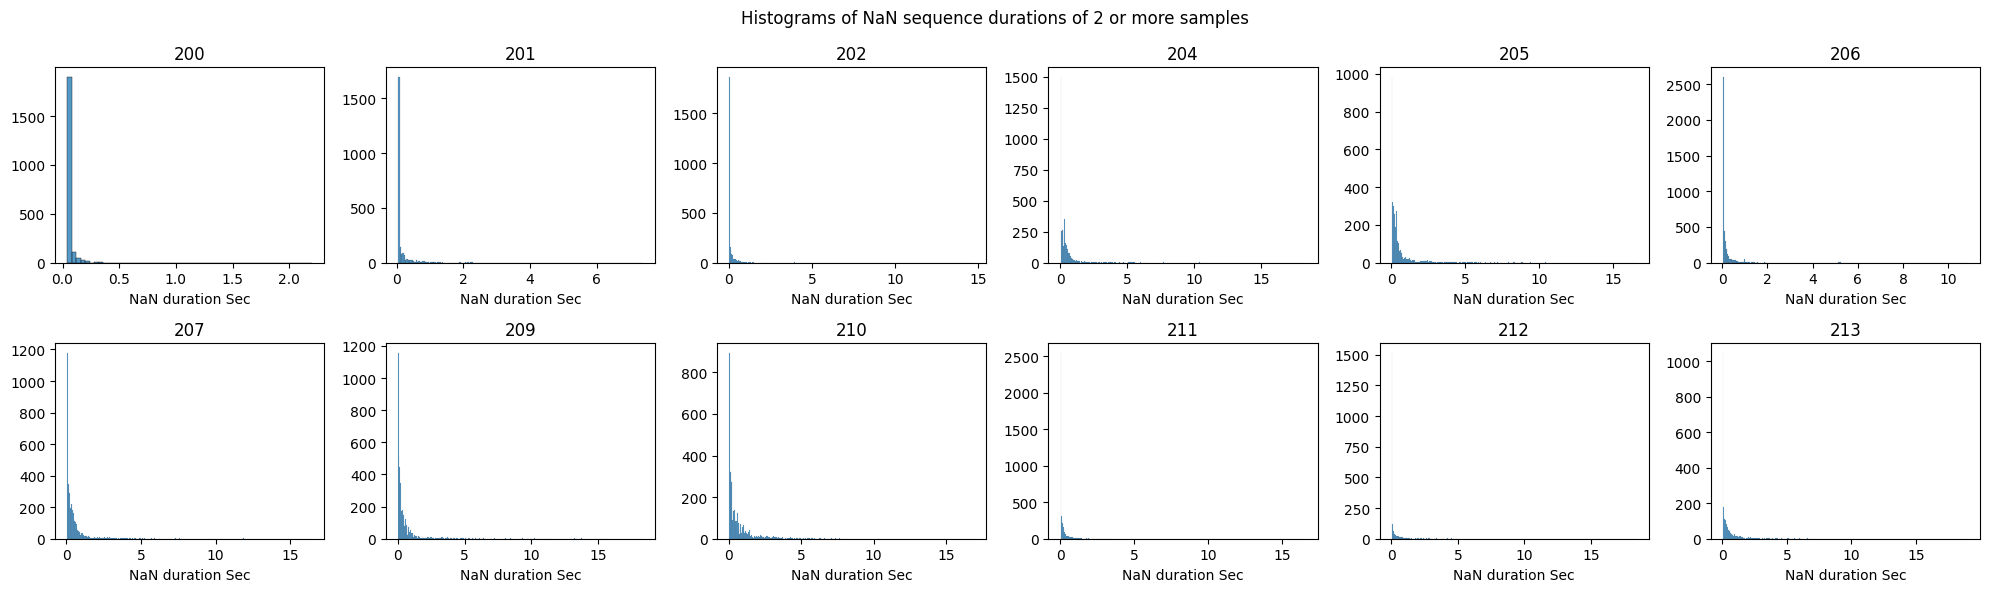

In [90]:
data_dir = "./results/resampled/"
data_suffix = "_nonan_50_resampled_data.csv"

resampled_marked_df_list = []
fig, axs = plt.subplots(2,6,figsize=(20,6))
for j,participant_id in enumerate(participant_list):
    data_path = os.path.join(data_dir, str(participant_id) + data_suffix)
    data_df = pd.read_csv(data_path)
    data_df['NaN - Count'] = pd.Series()
    nan_sequence_lengths = []
    for i,trial_no in enumerate(sorted(data_df['Trial no'].unique())):
        trial = data_df[data_df['Trial no']==trial_no]
        nan_list = find_consecutive_nans(trial)
        nan_list = nan_list[nan_list>1]
        data_df.loc[data_df['Trial no']==trial_no,'NaN - Count'] = mark_nan_sequences(trial)
        nan_sequence_lengths.append(nan_list)

    resampled_marked_df_list.append(data_df)
    nan_lengths = pd.concat(nan_sequence_lengths)
    nan_sequence_df = pd.DataFrame()
    nan_sequence_df['NaN duration Sec'] = nan_lengths*0.02
    sns.histplot(nan_sequence_df,x='NaN duration Sec',binwidth=0.04,ax=axs[j//6,j%6])
    axs[j//6,j%6].set_title(str(participant_id))
    if j!=0 or j!=6:
        axs[j//6,j%6].set_ylabel('')
fig.suptitle('Histograms of NaN sequence durations of 2 or more samples')
plt.tight_layout()
plt.show()

Even when omitting 1 sample NaN points, in general the NaN sequence lengths are concentrated in the 2 sample bin, so 0.04 s duration. Further on I'll plot histograms for each block for each participant, including only baseline+stimulus.

Binwidth for histograms is kept constant at 0.04 ms, it's small because otherwise the first histogram bar heavily overpowers the rest. I kept the x axis varied since it's informative about the true range of NaN sequence lengths to expect in the block (since sometimes the histogram bars are near invisible).

If a plot of a block is missing, that means there were no NaN sequences.

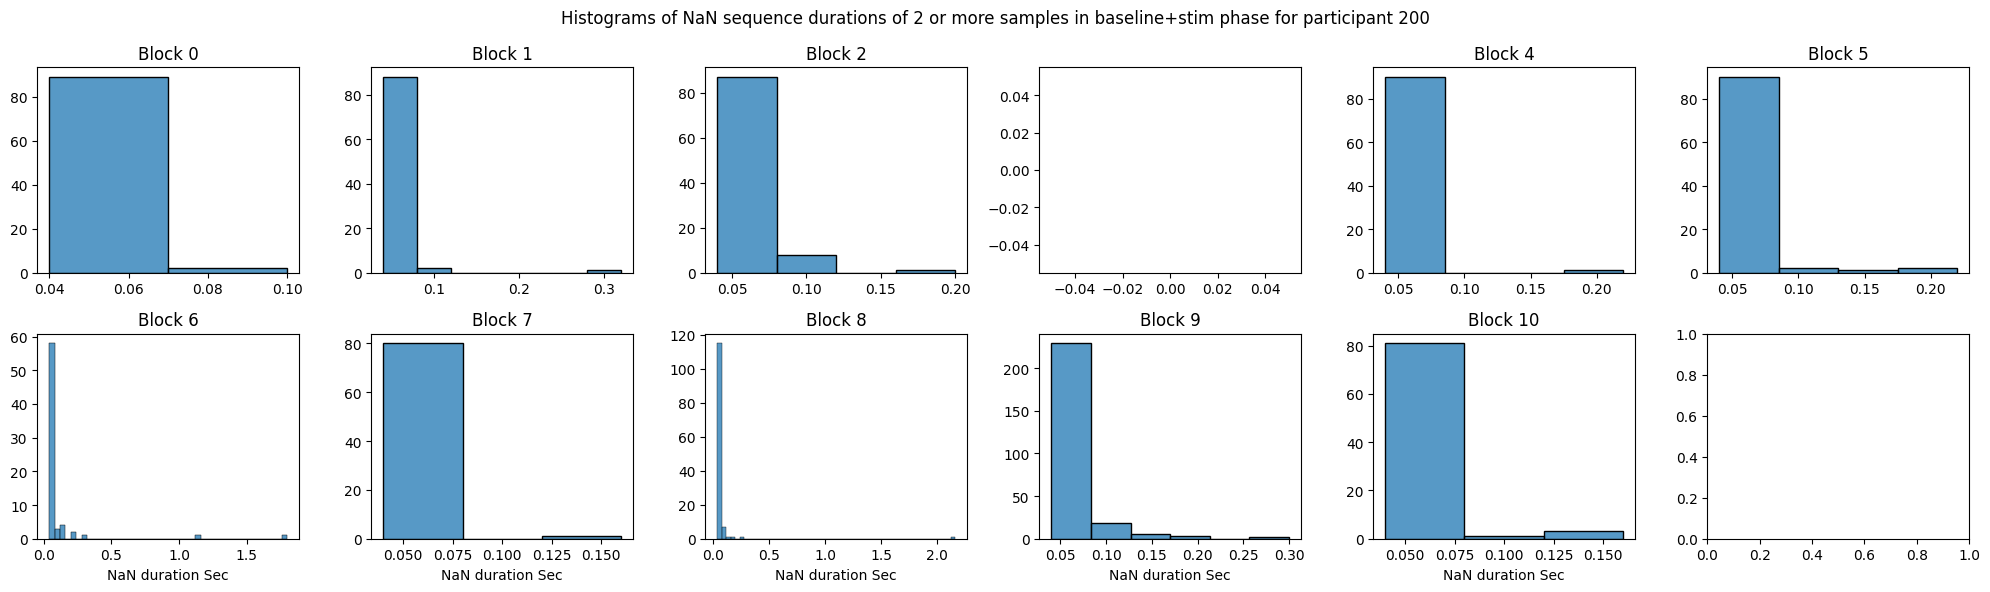

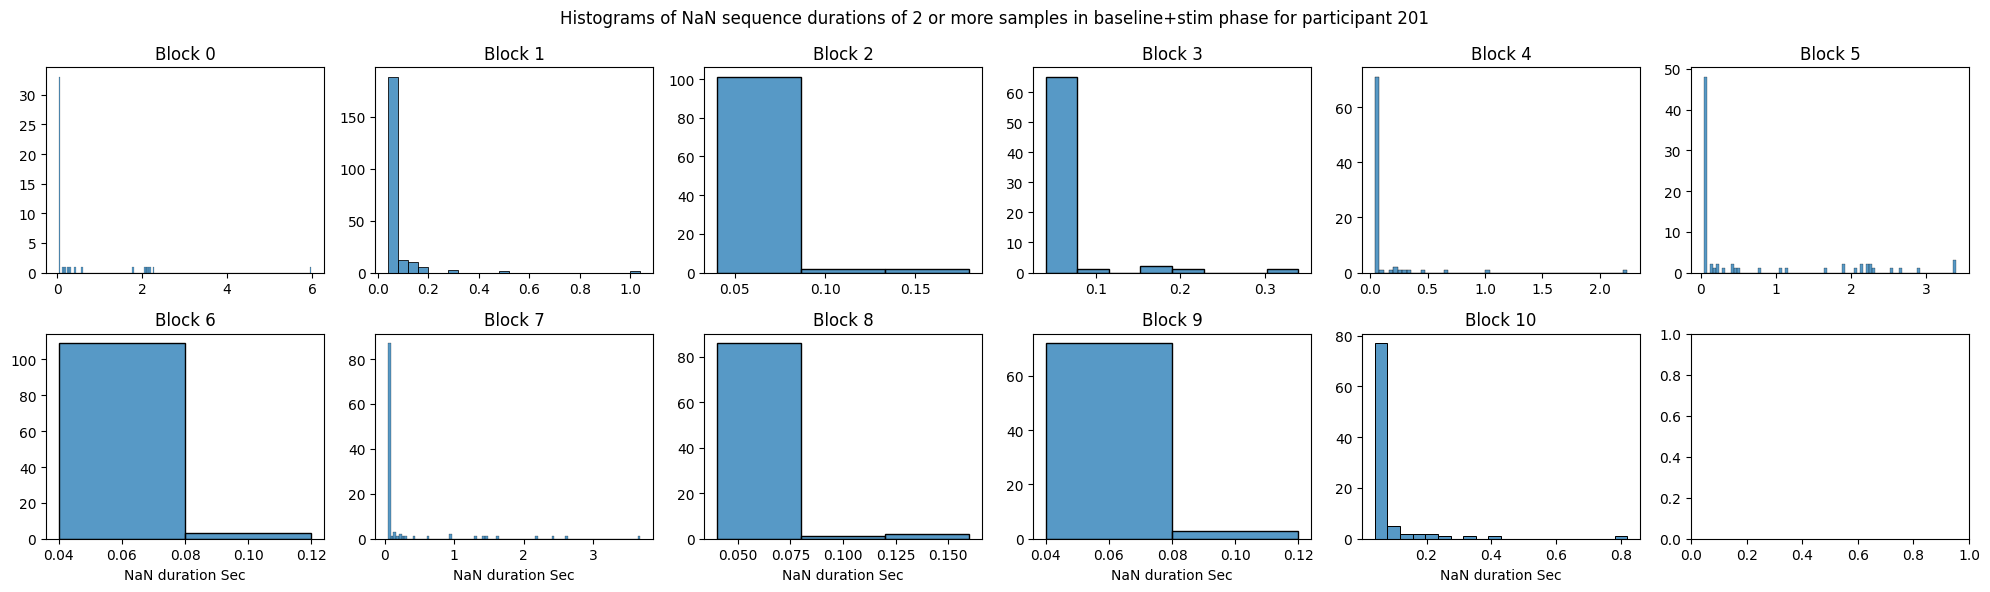

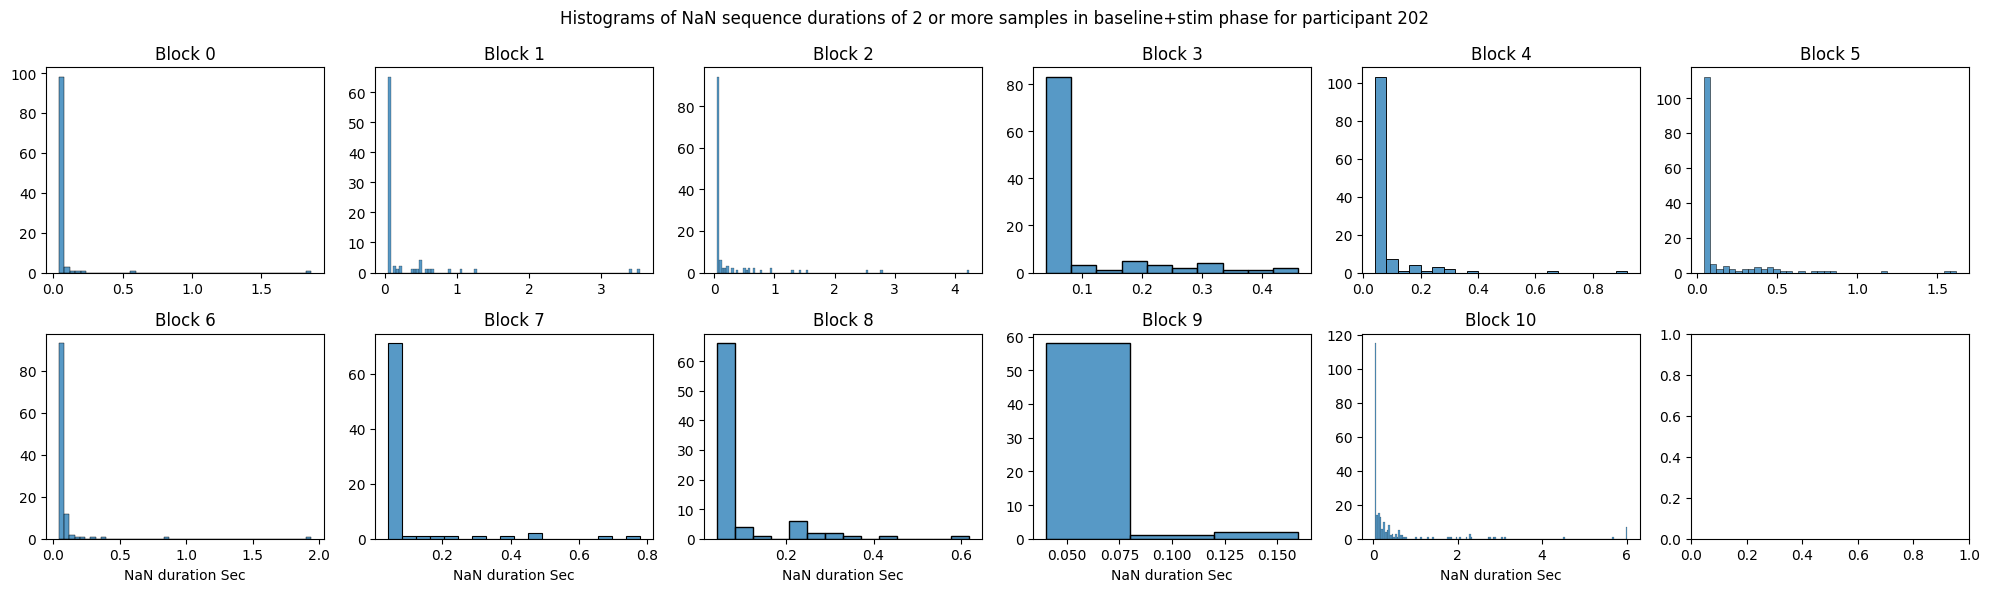

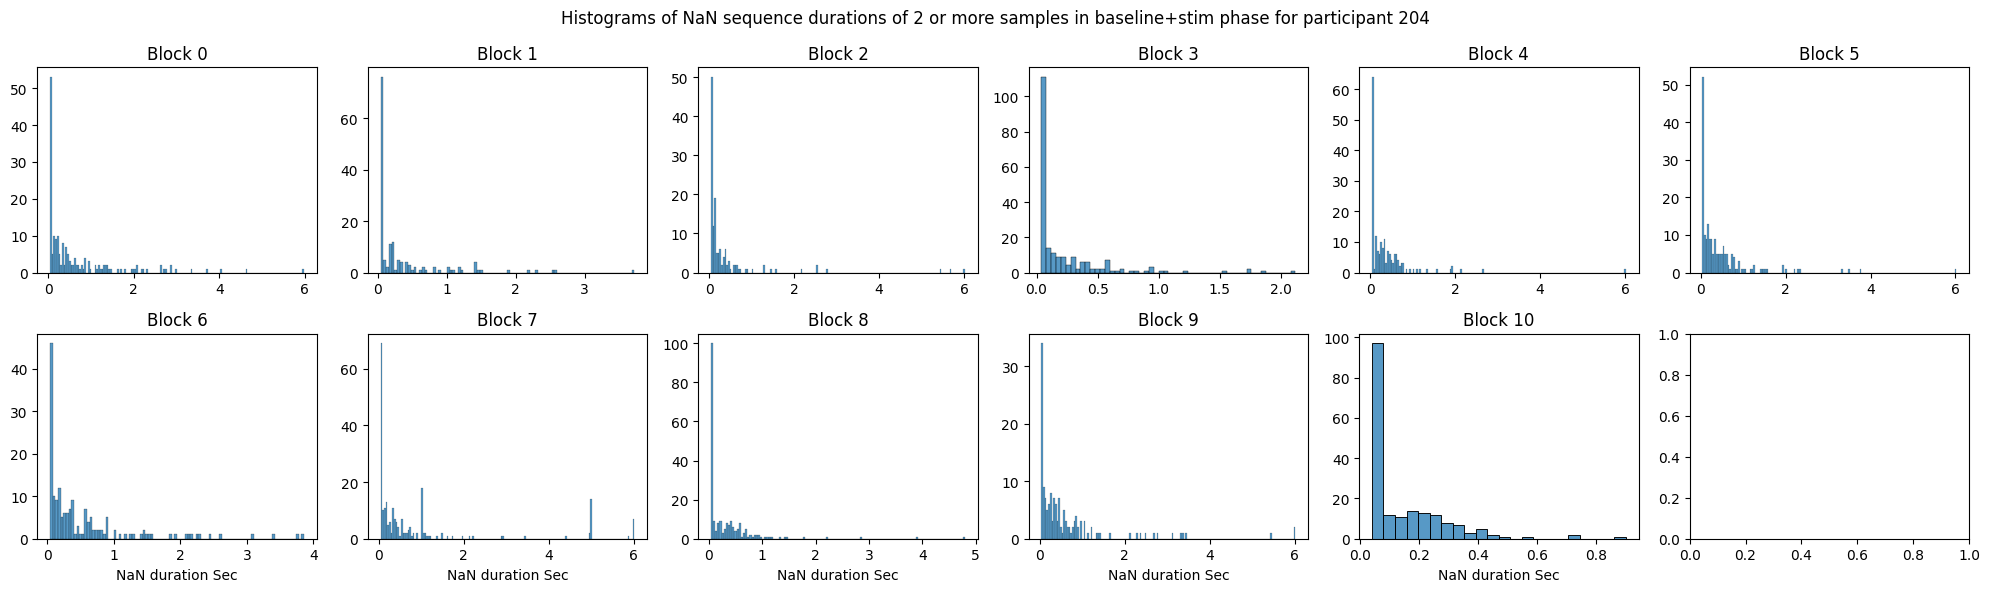

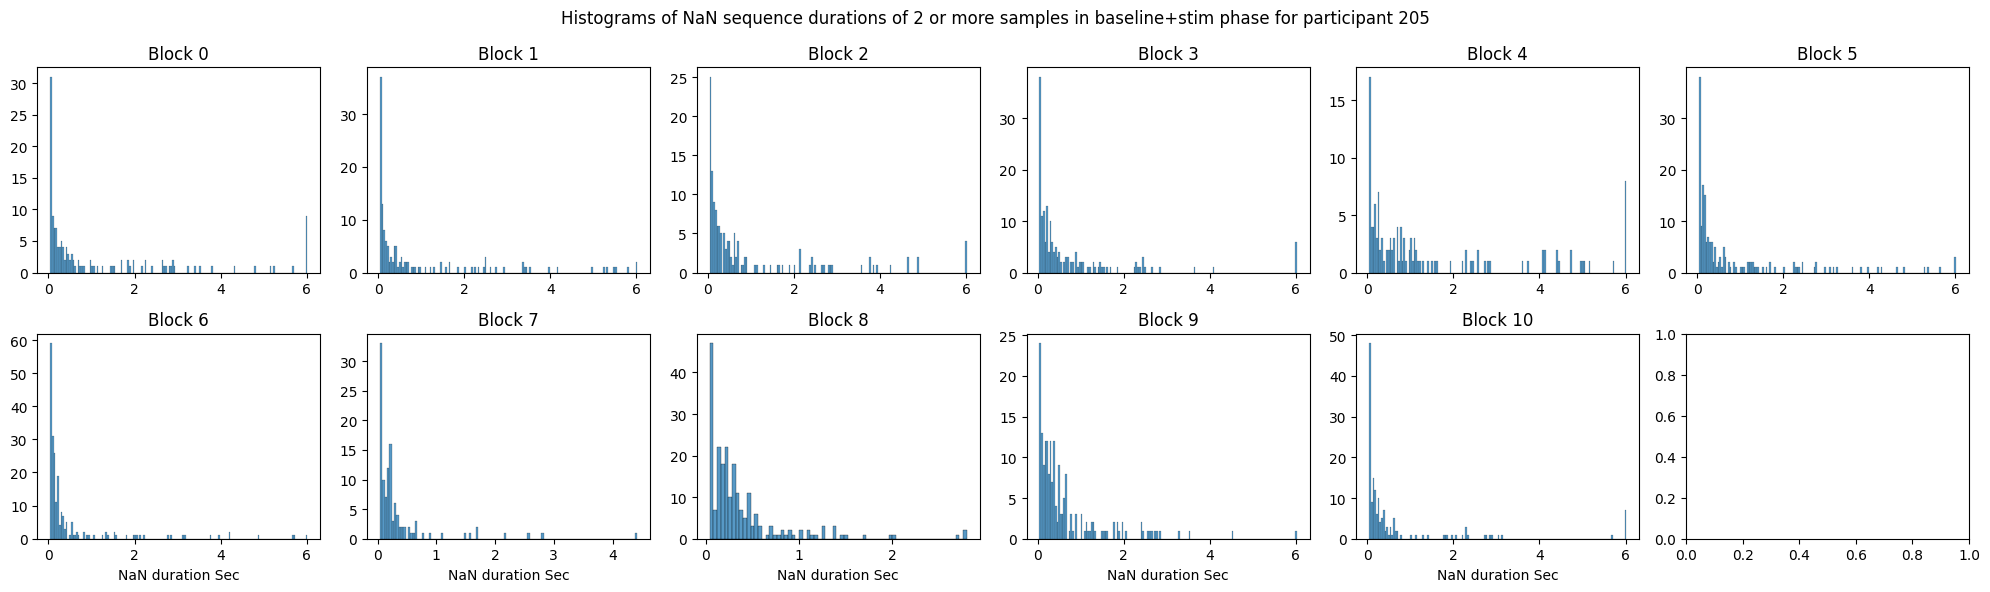

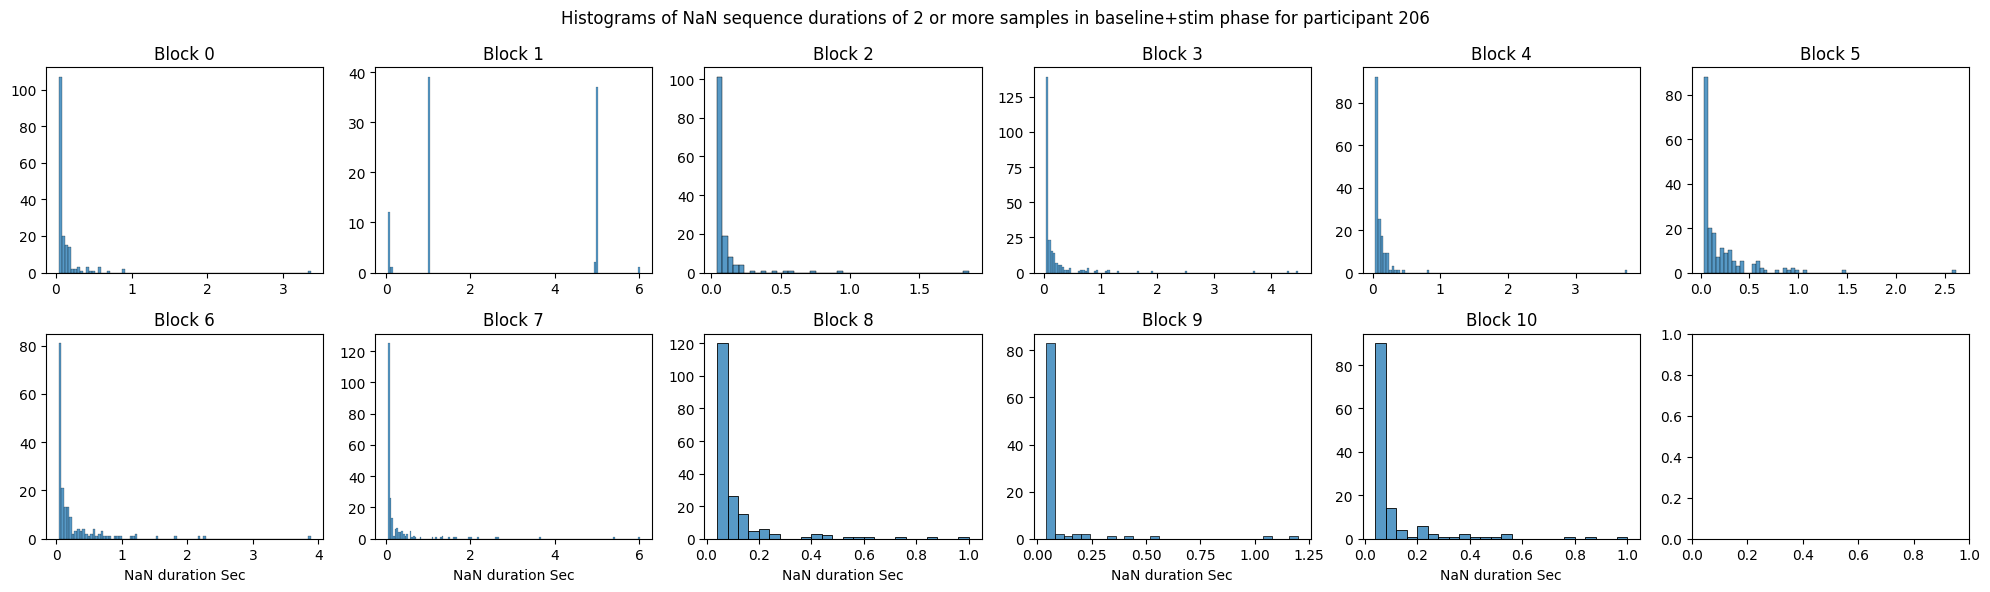

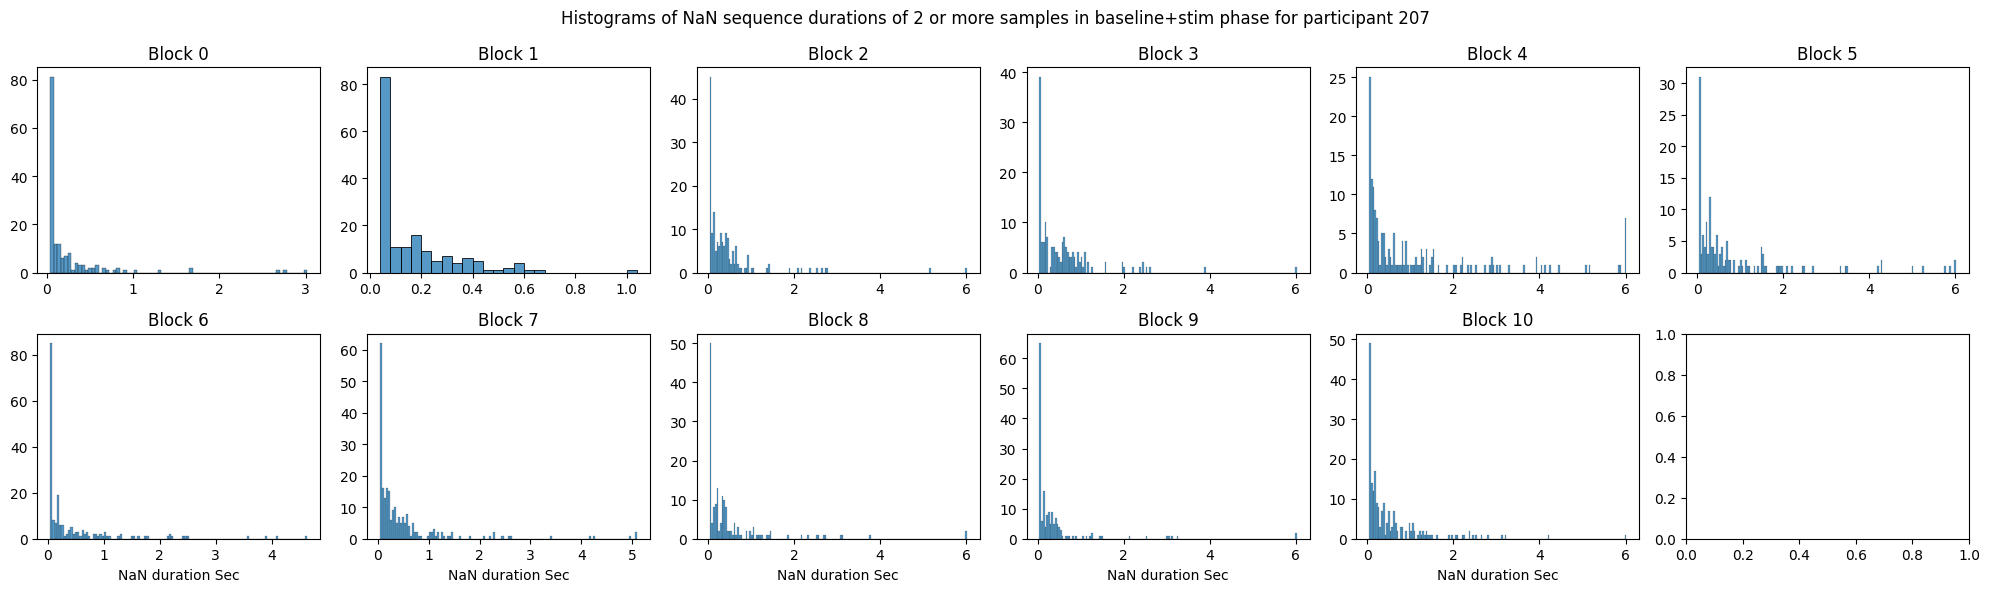

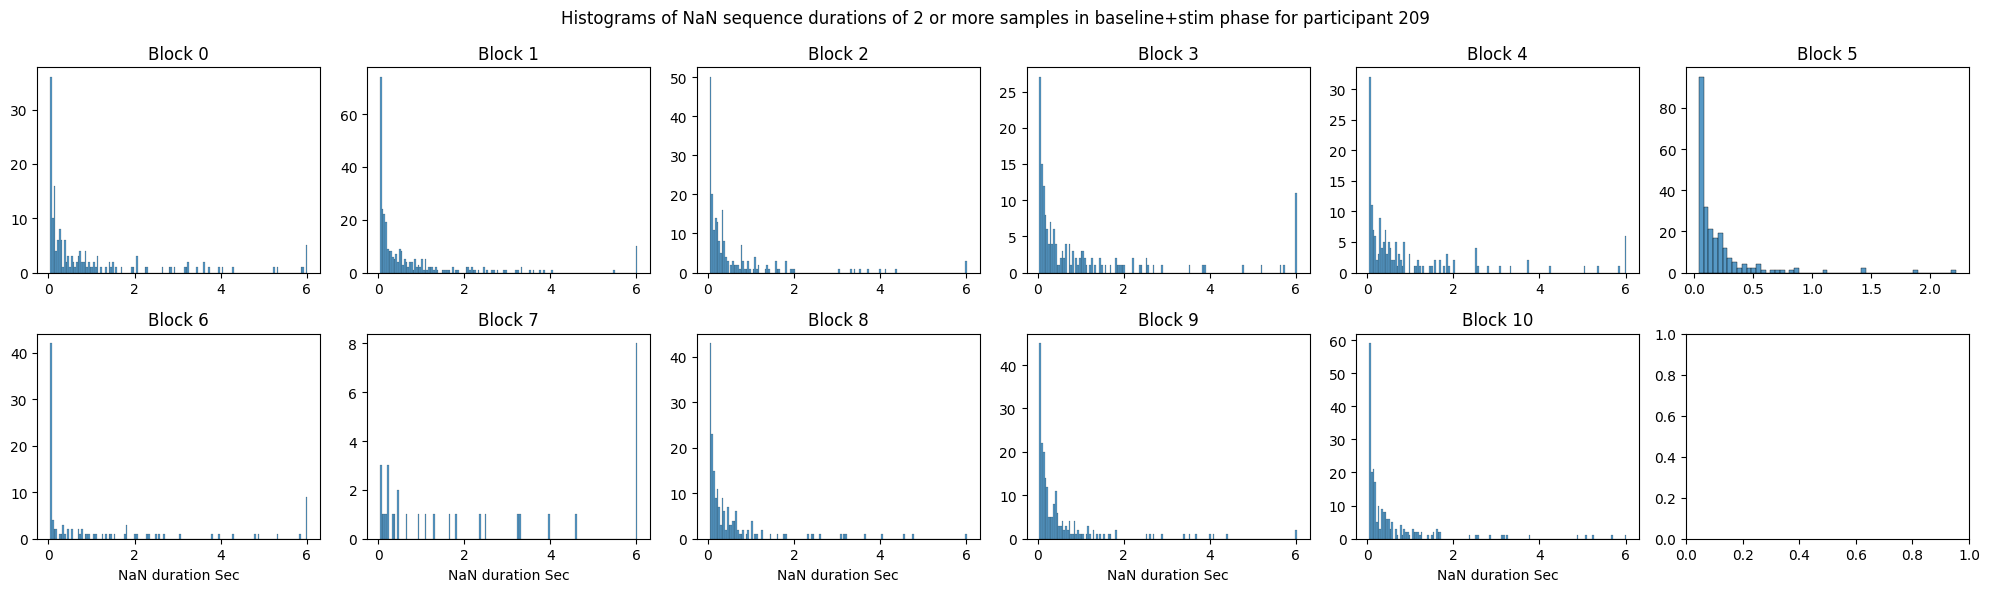

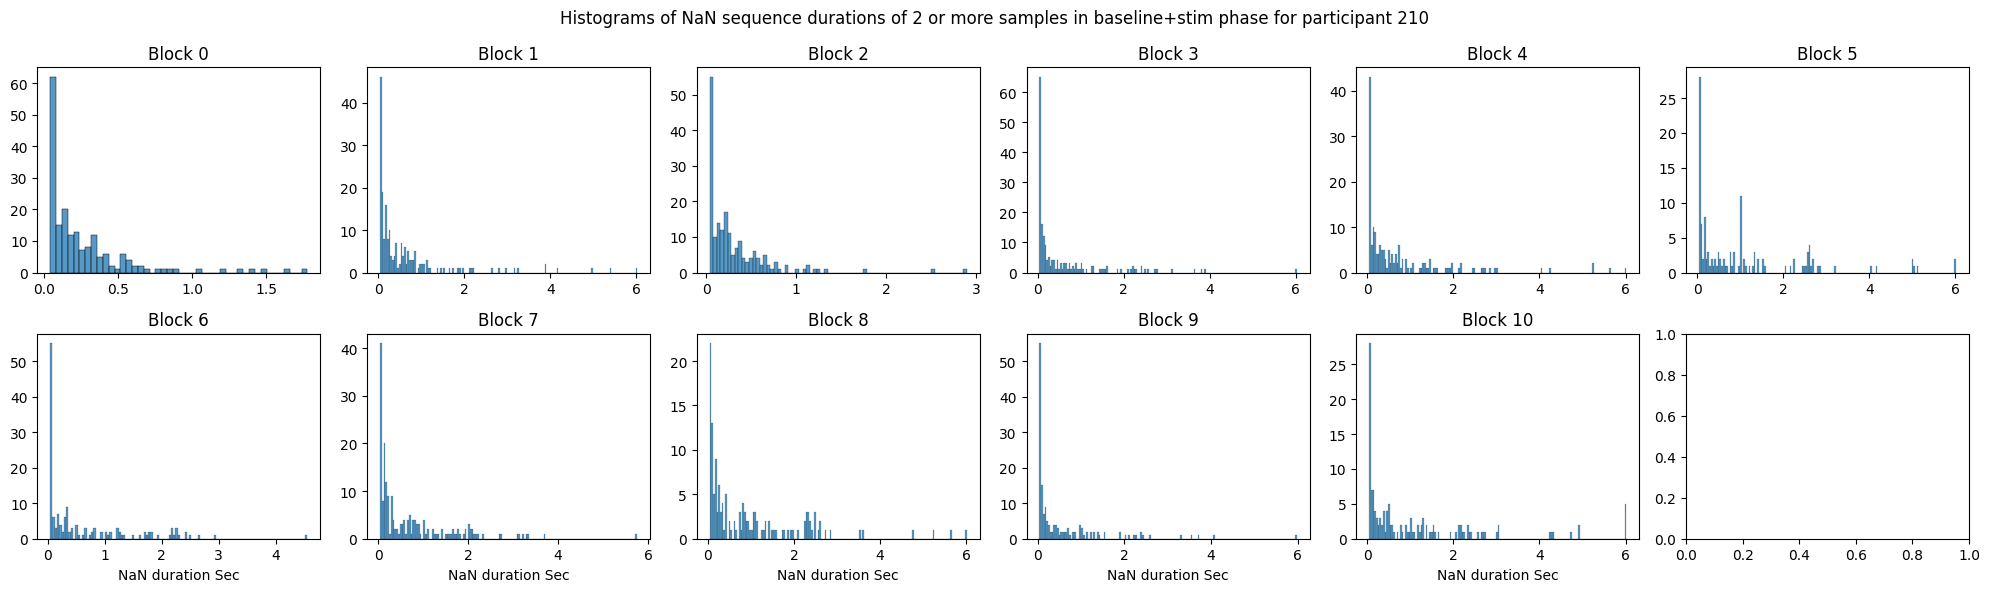

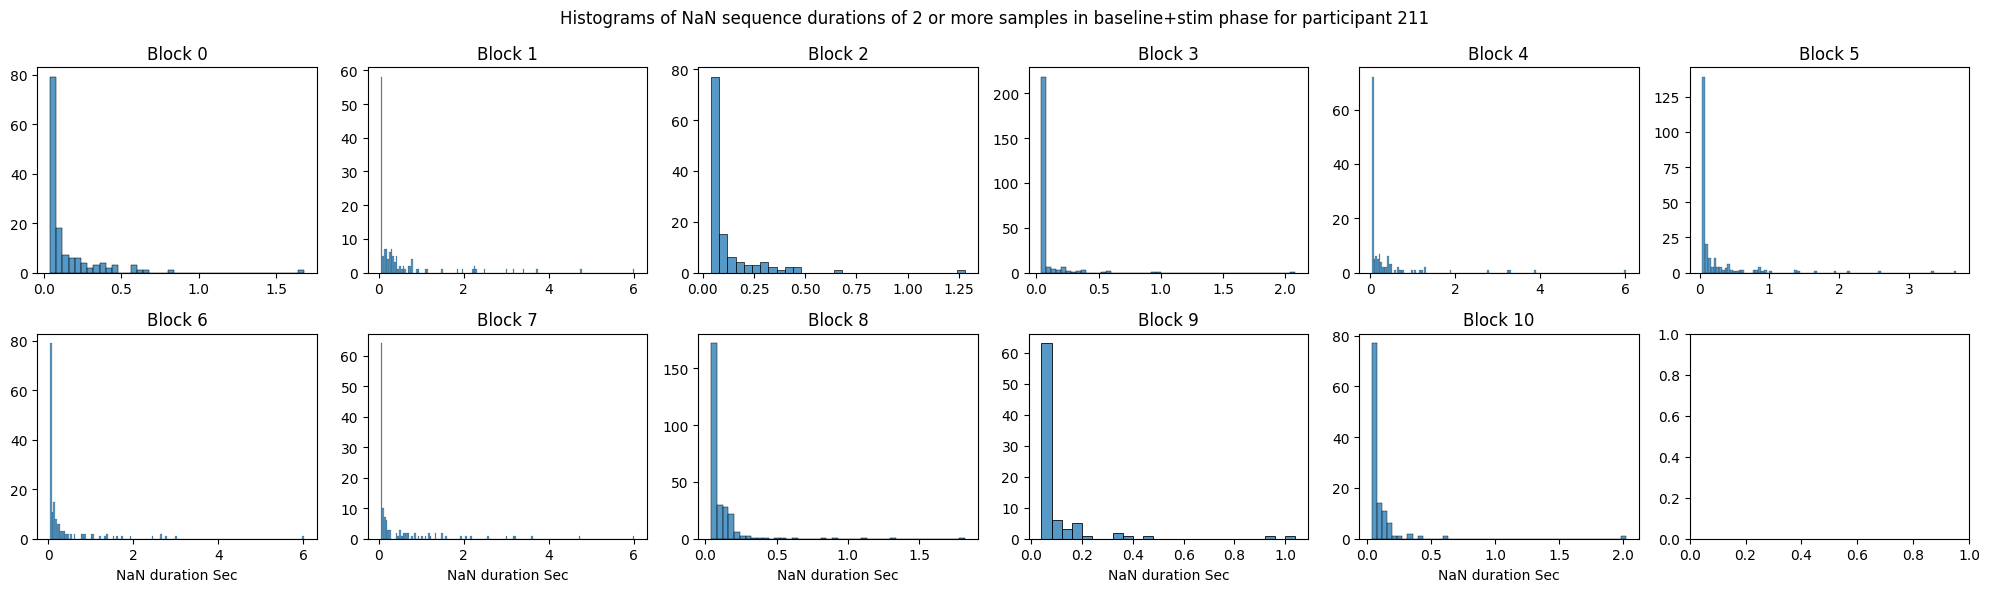

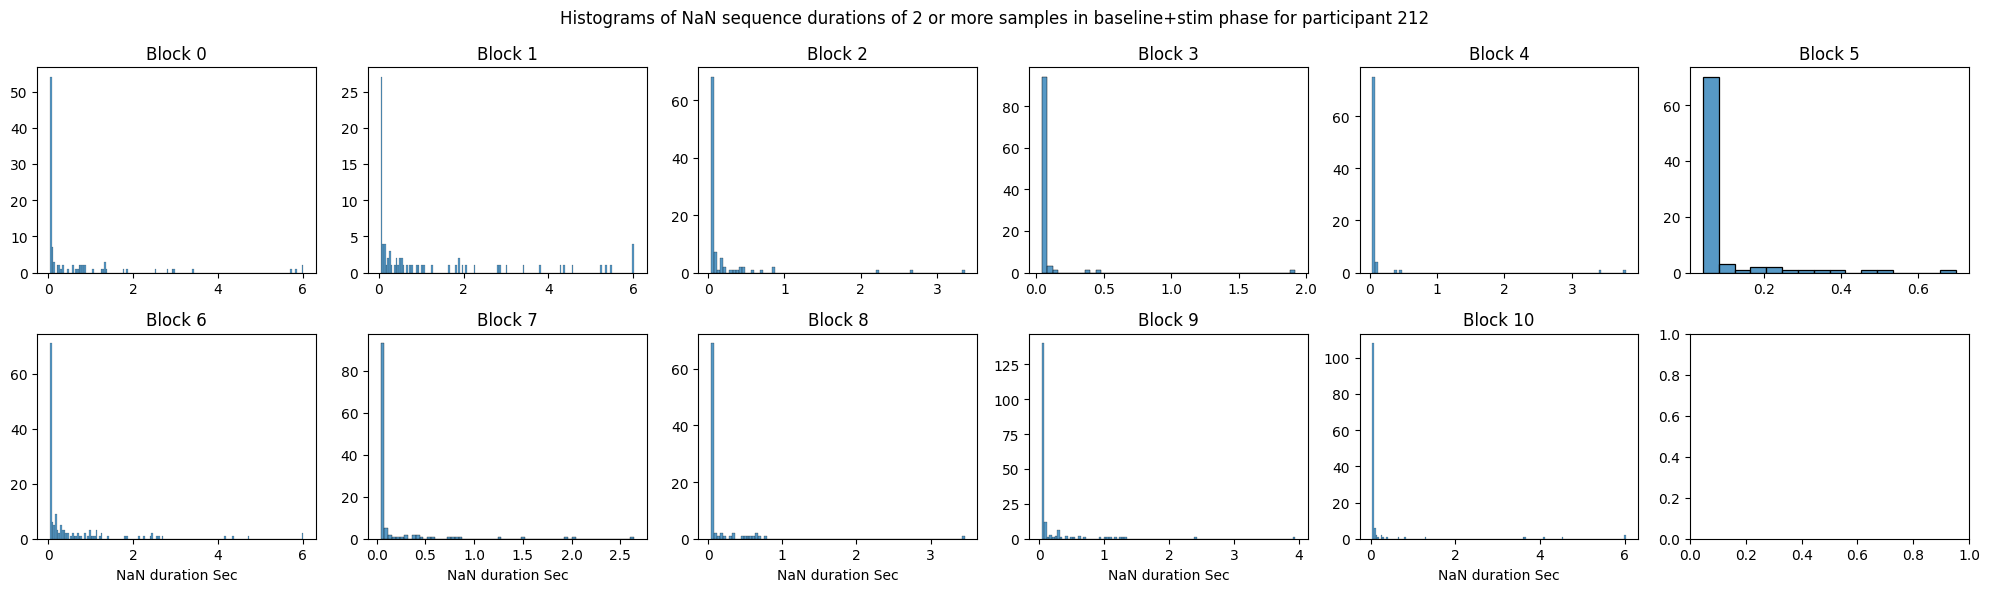

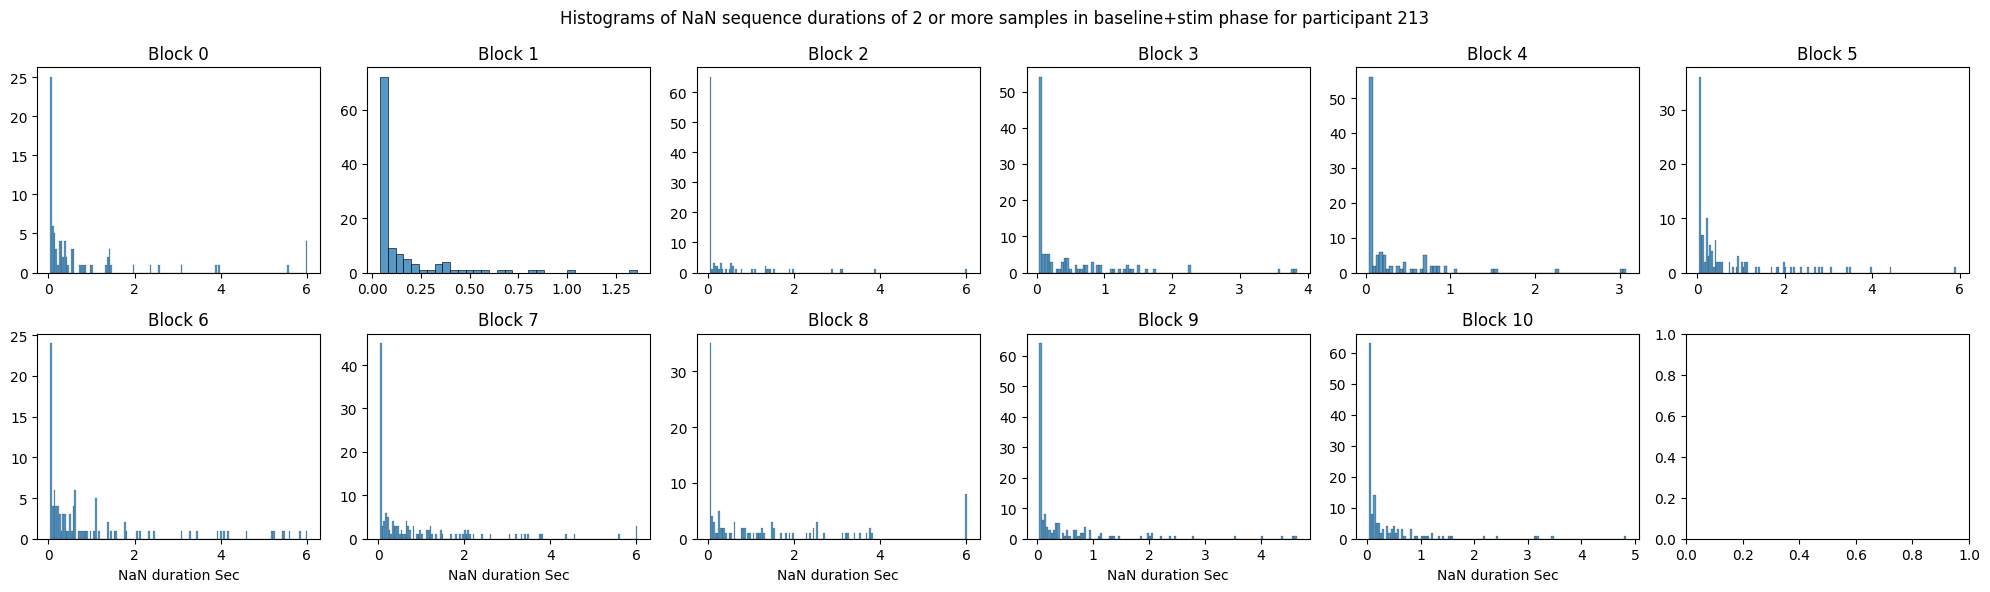

In [ ]:
blocks = np.arange(11)
data_dir = "./results/resampled/"
data_suffix = "_nonan_50_resampled_data.csv"

for j,participant_id in enumerate(participant_list):
    data_path = os.path.join(data_dir, str(participant_id) + data_suffix)
    data_df = pd.read_csv(data_path)
    fig, axs = plt.subplots(2,6,figsize=(20,6))
    
    for block in blocks:
        nan_sequence_lengths = []
        block_df = data_df[(data_df['Block']==block) & (data_df['Trial phase']!='post-stim')]
        for i,trial_no in enumerate(sorted(data_df['Trial no'].unique())):
            trial = block_df[block_df['Trial no']==trial_no]
            nan_list = find_consecutive_nans(trial)
            nan_list = nan_list[nan_list>1]
            nan_sequence_lengths.append(nan_list)

        nan_lengths = pd.concat(nan_sequence_lengths)
        nan_sequence_df = pd.DataFrame()
        nan_sequence_df['NaN duration Sec'] = nan_lengths*0.02
        #the plotting is wrapped in try, except since ValueError was raised when there were no elements to plot
        try:
            sns.histplot(nan_sequence_df,x='NaN duration Sec',binwidth=0.04,ax=axs[block//6,block%6])
            axs[block//6,block%6].set_title('Block '+str(block))
            if block!=0 or block!=6:
                axs[block//6,block%6].set_ylabel('')
            if block<6:
                axs[block//6,block%6].set_xlabel('')
        except ValueError:
            continue
    fig.suptitle('Histograms of NaN sequence durations of 2 or more samples in baseline+stim phase for participant '+str(participant_id))
    plt.tight_layout()
    plt.show()

# <a id='toc3_'></a>[Histograms of NaN sequence durations for data resampled to 25 Hz](#toc0_)

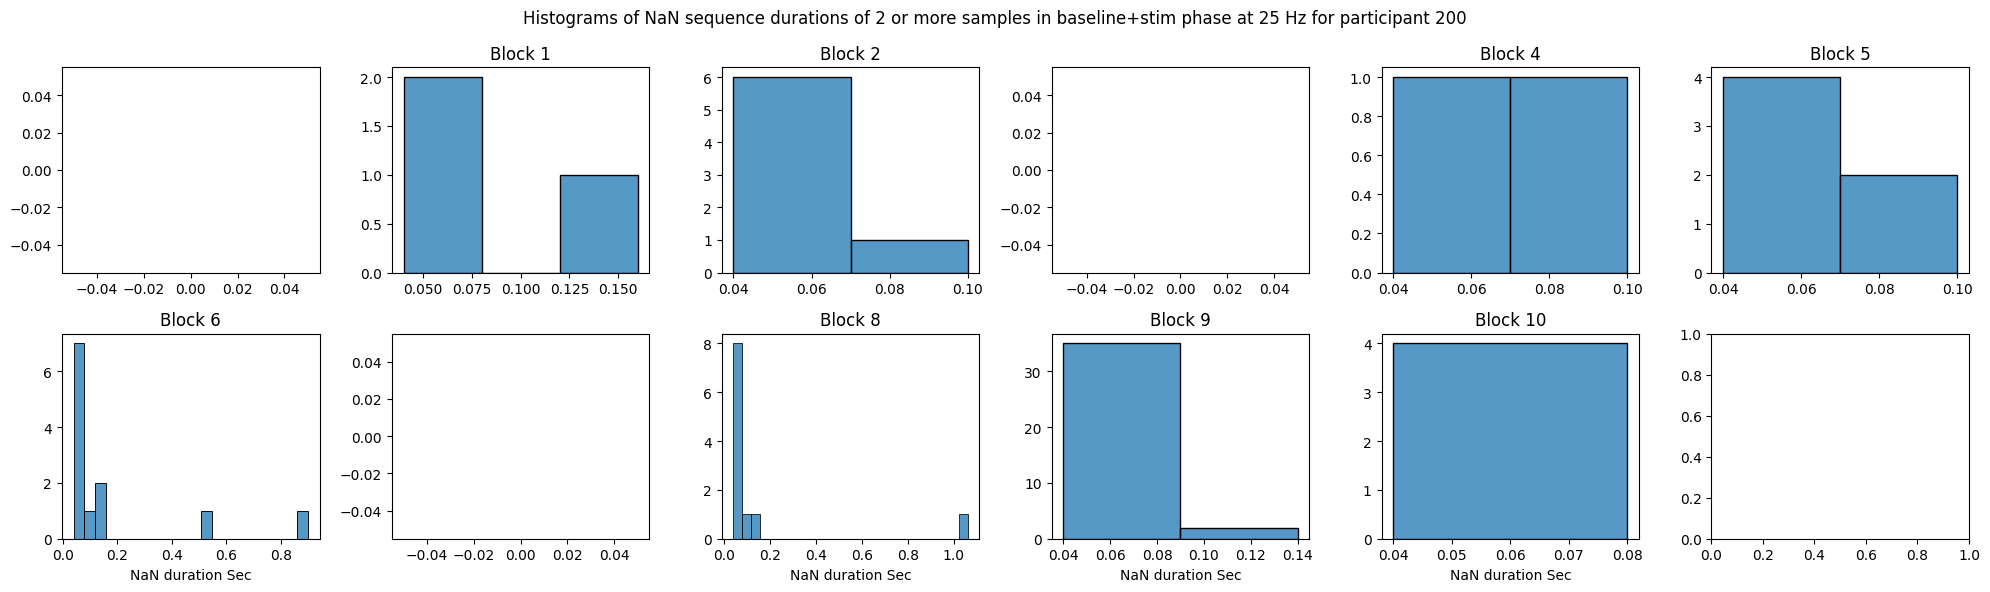

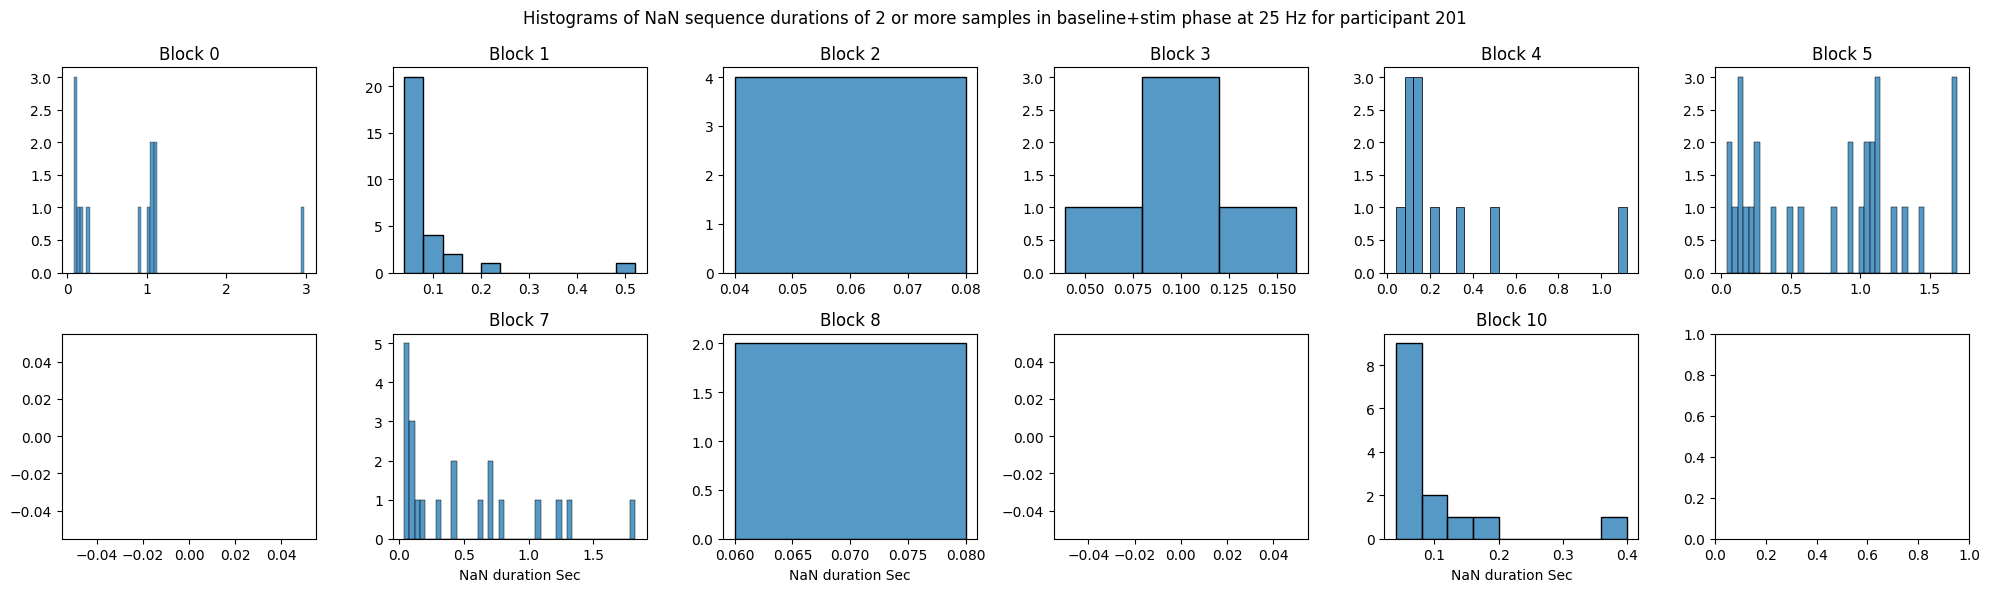

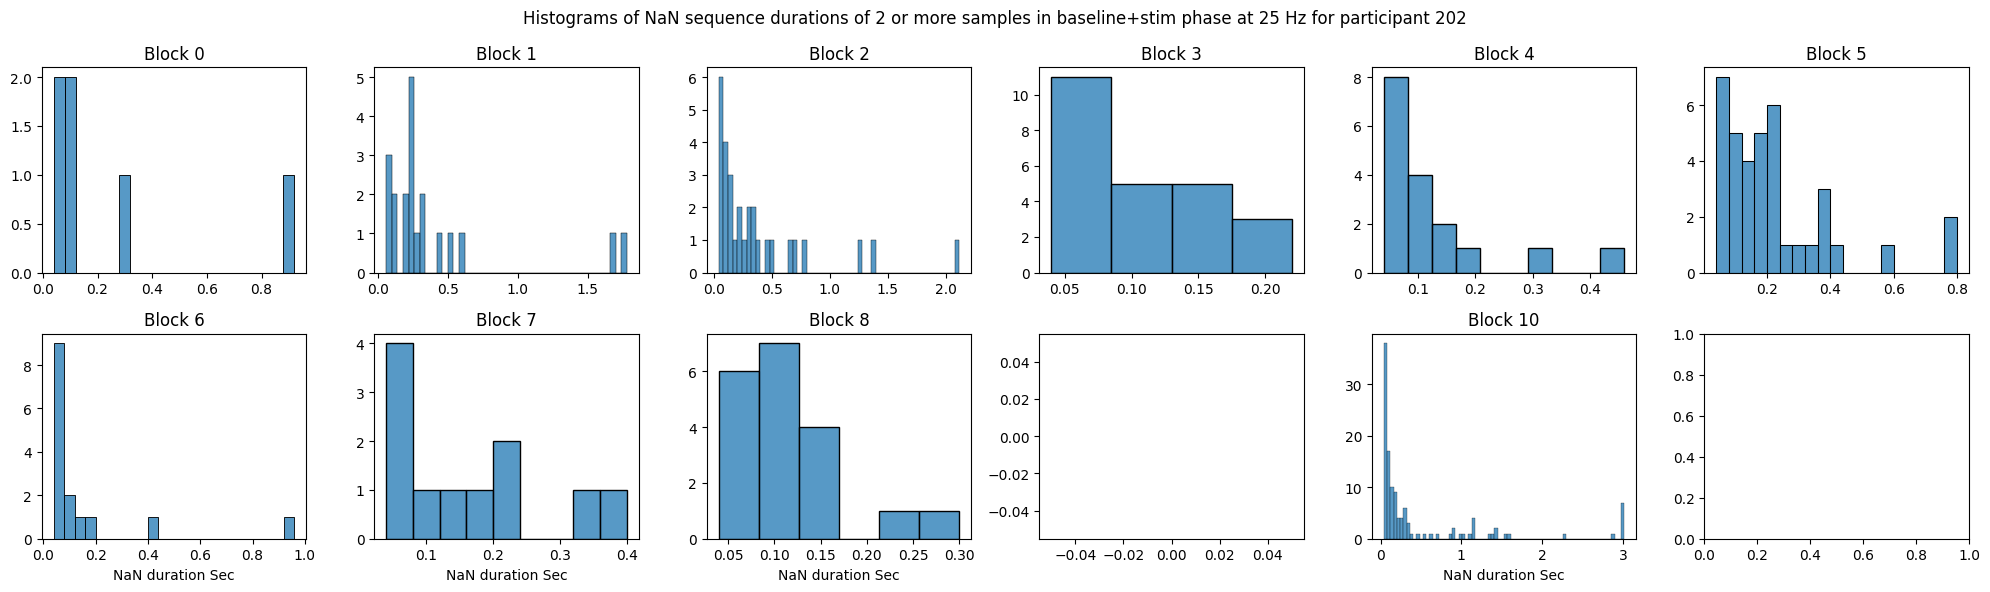

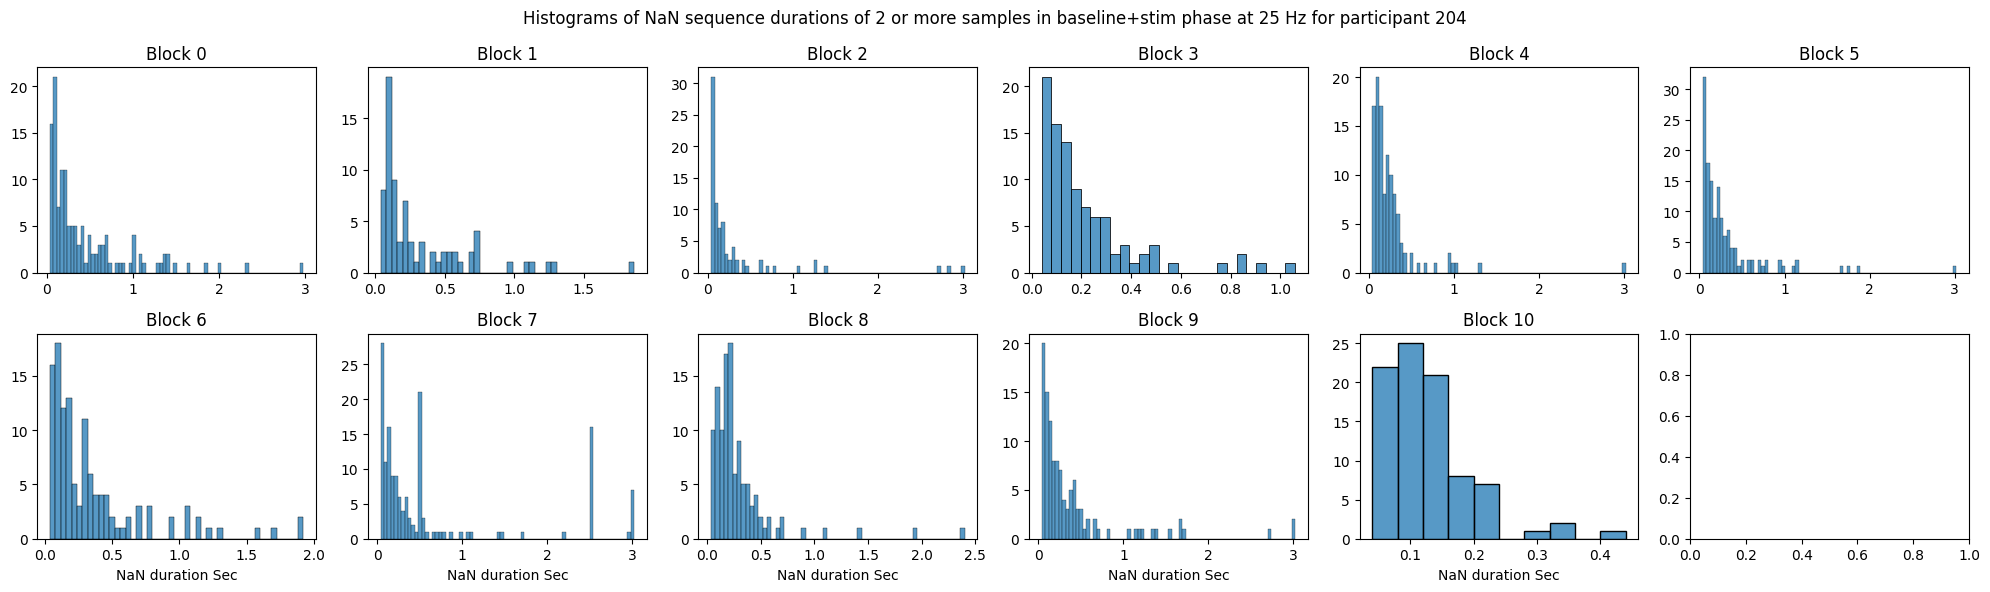

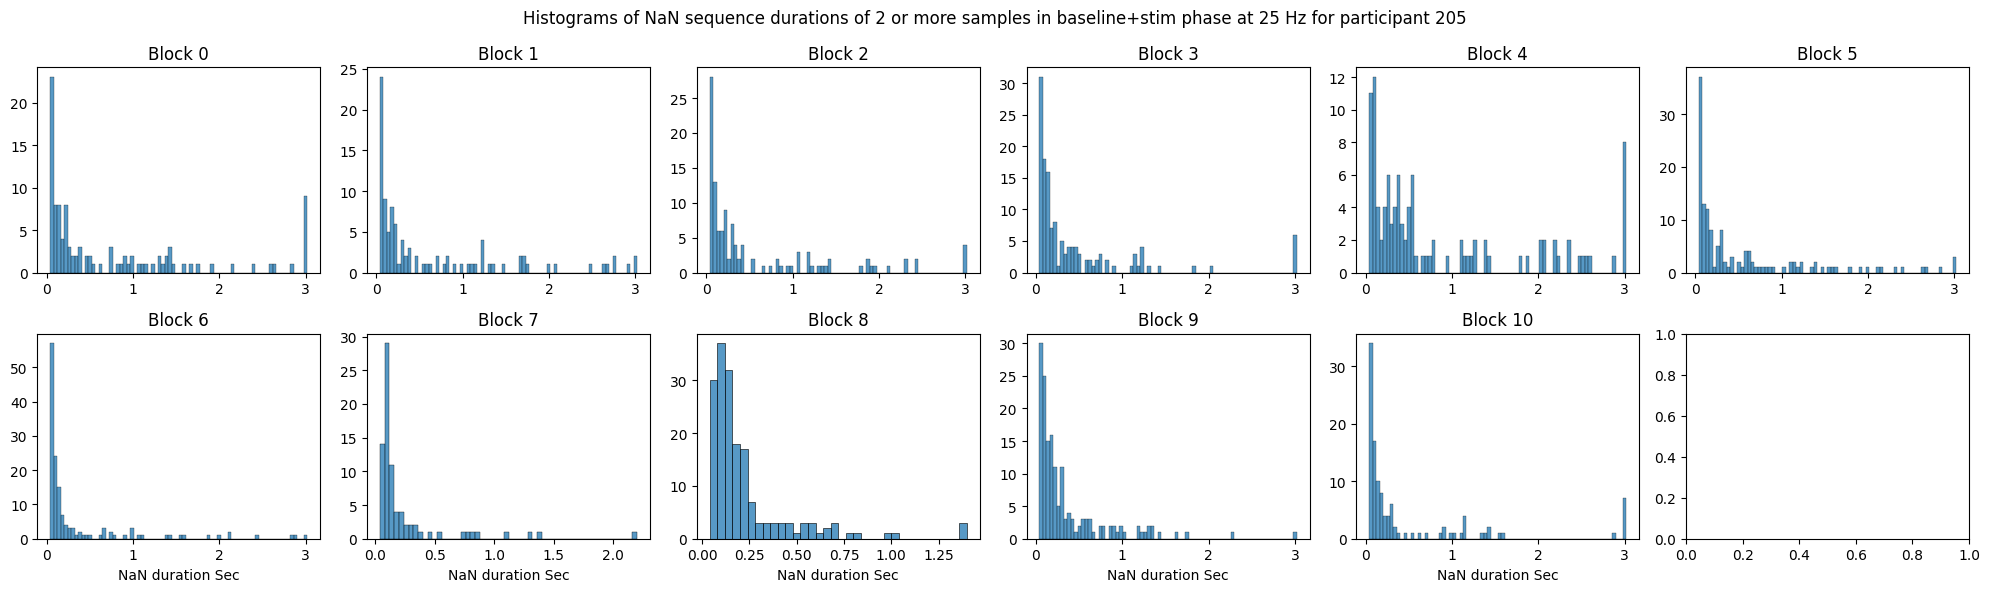

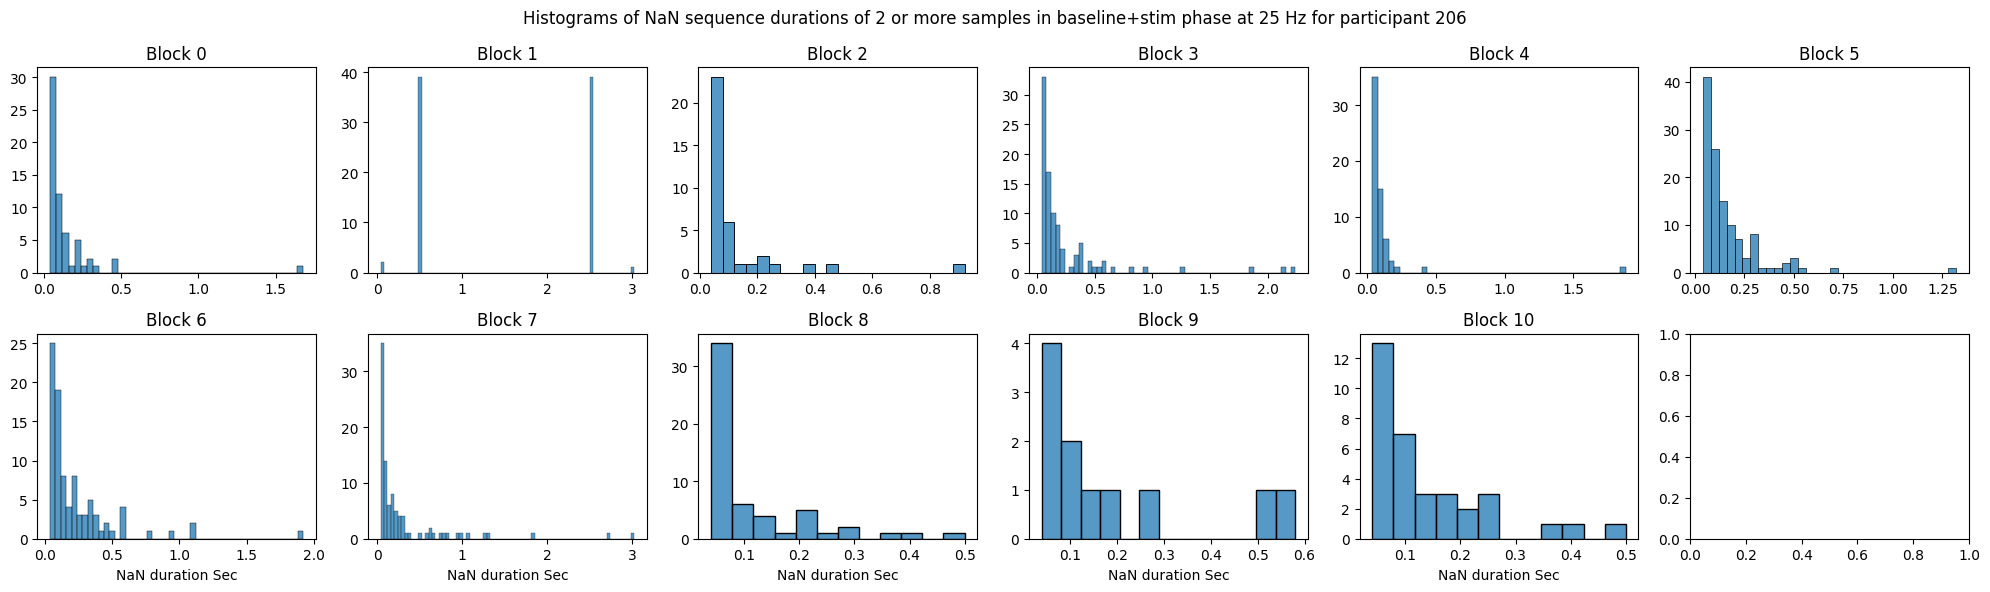

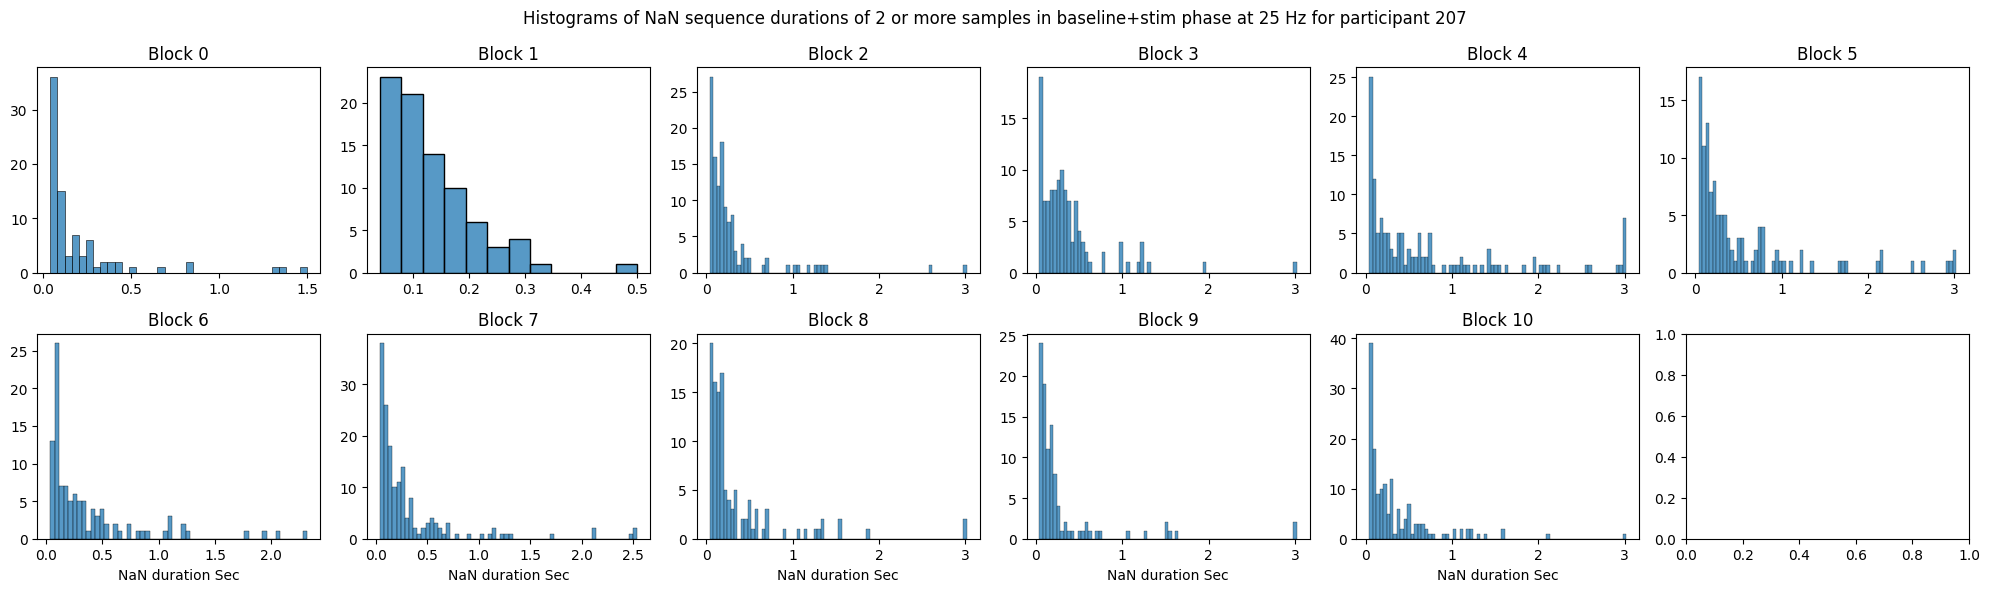

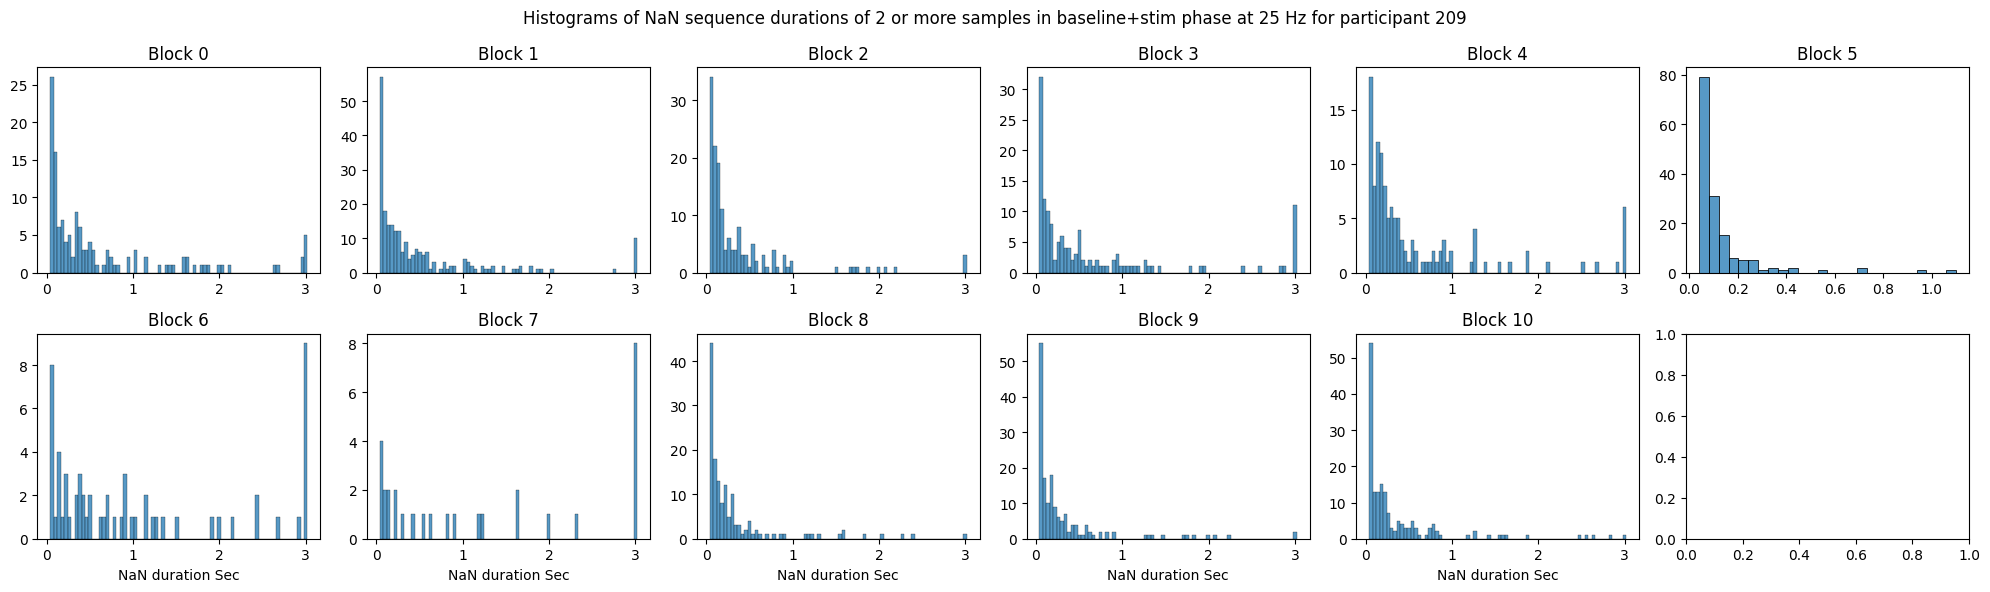

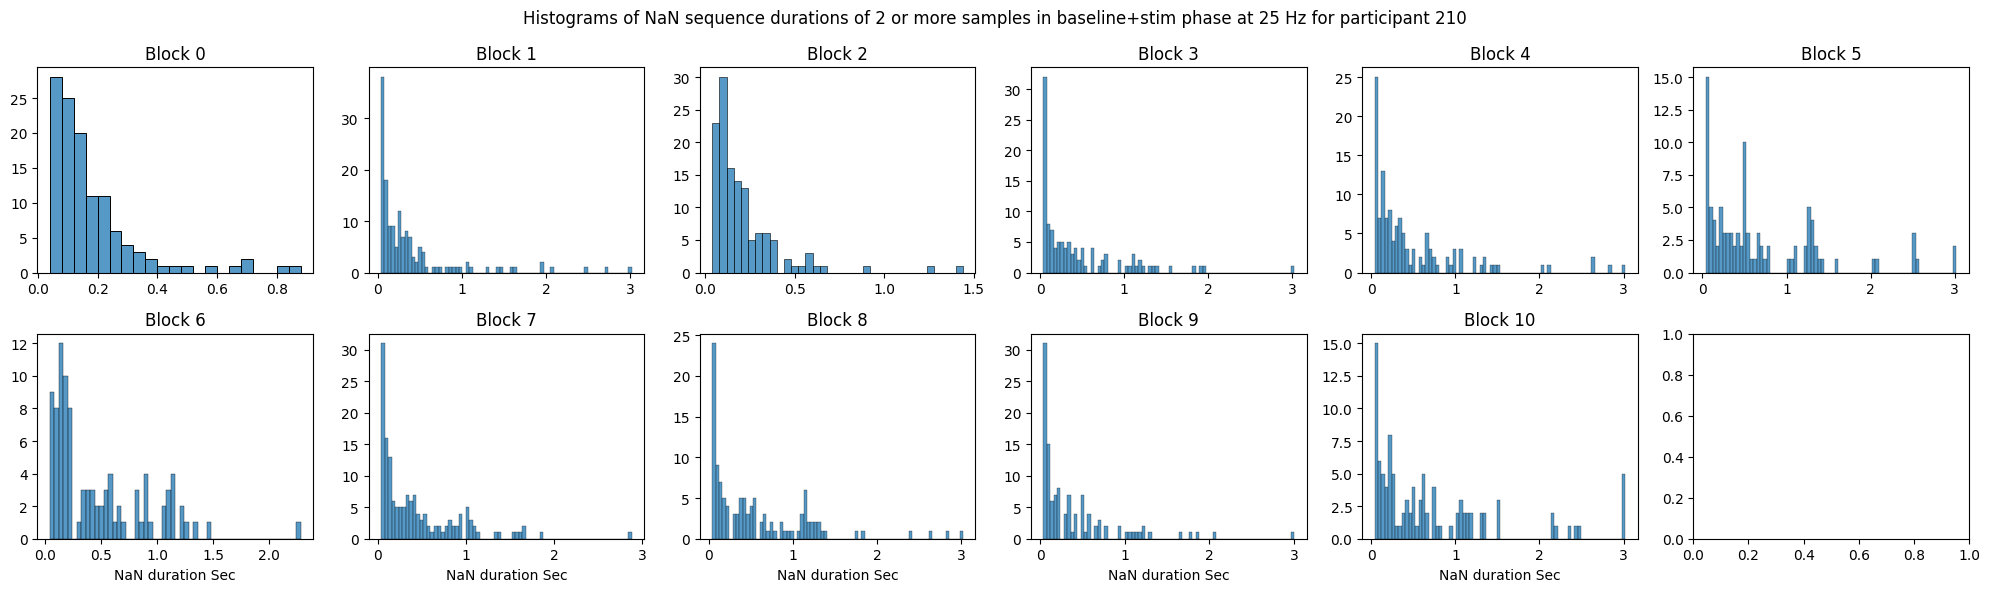

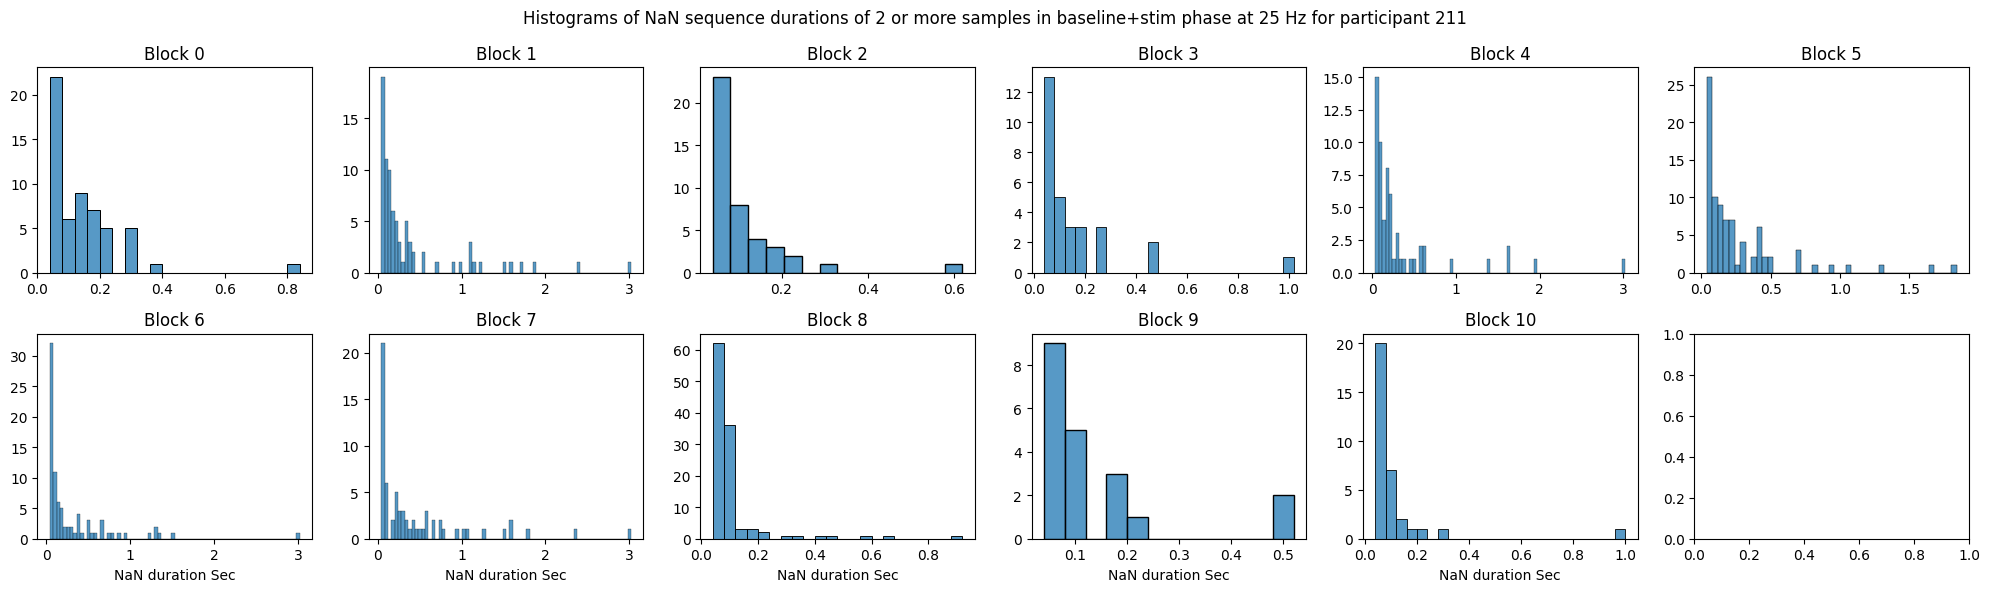

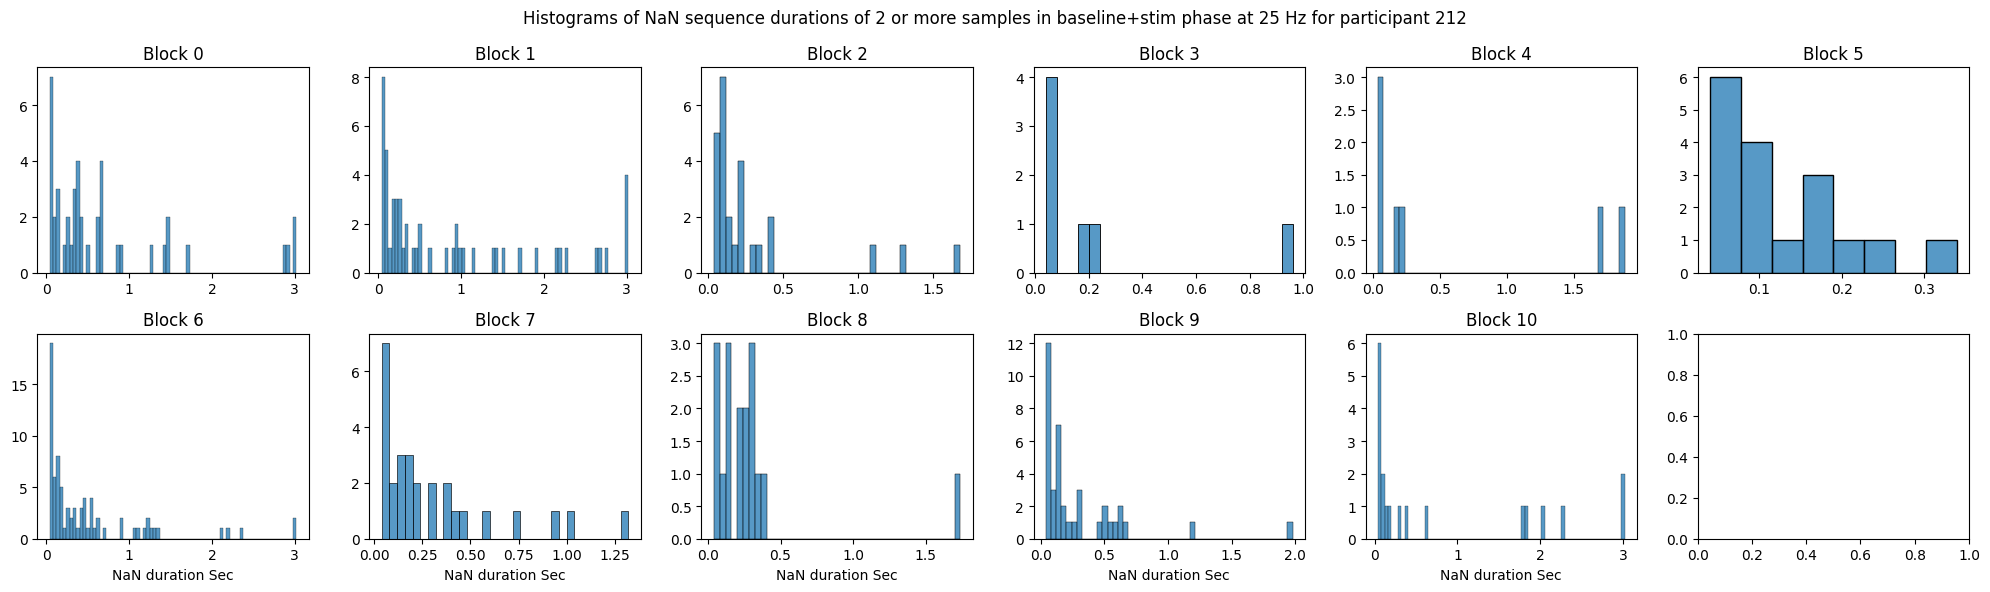

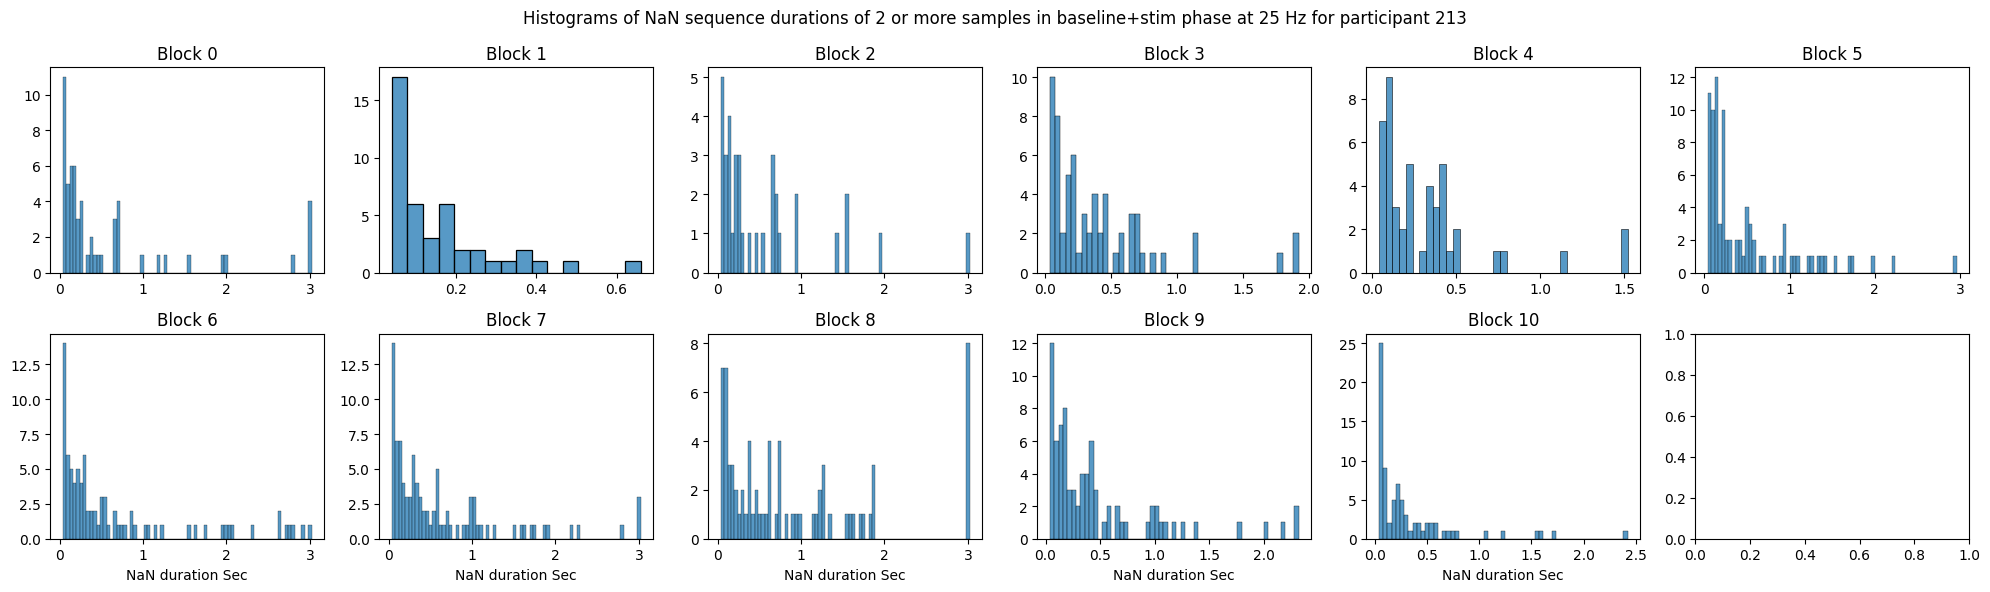

In [ ]:
blocks = np.arange(11)
data_dir = "./results/resampled/"
data_suffix = "_nonan_25_resampled_data.csv"

for j,participant_id in enumerate(participant_list):
    data_path = os.path.join(data_dir, str(participant_id) + data_suffix)
    data_df = pd.read_csv(data_path)
    fig, axs = plt.subplots(2,6,figsize=(20,6))
    
    for block in blocks:
        nan_sequence_lengths = []
        block_df = data_df[(data_df['Block']==block) & (data_df['Trial phase']!='post-stim')]
        for i,trial_no in enumerate(sorted(data_df['Trial no'].unique())):
            trial = block_df[block_df['Trial no']==trial_no]
            nan_list = find_consecutive_nans(trial)
            nan_list = nan_list[nan_list>1]
            nan_sequence_lengths.append(nan_list)

        nan_lengths = pd.concat(nan_sequence_lengths)
        nan_sequence_df = pd.DataFrame()
        nan_sequence_df['NaN duration Sec'] = nan_lengths*0.02
        #the plotting is wrapped in try, except since ValueError was raised when there were no elements to plot
        try:
            sns.histplot(nan_sequence_df,x='NaN duration Sec',binwidth=0.04,ax=axs[block//6,block%6])
            axs[block//6,block%6].set_title('Block '+str(block))
            if block!=0 or block!=6:
                axs[block//6,block%6].set_ylabel('')
            if block<6:
                axs[block//6,block%6].set_xlabel('')
        except ValueError:
            continue
    fig.suptitle('Histograms of NaN sequence durations of 2 or more samples in baseline+stim phase at 25 Hz for participant '+str(participant_id))
    plt.tight_layout()
    plt.show()

# <a id='toc4_'></a>[Amount of trials remaining depending on data percentage acceptance threshold](#toc0_)

In [103]:
data_dir = "./results/resampled/" #directory with resampled data 
data_suffix = "_nonan_50_resampled_data.csv" #name of file with 50 Hz resampled data from participant 2xx, name format: 2xxdata_suffix

threshold_step=0.01
acceptance_threshold_dfs = {}

for participant_id in participant_list:
    data_path = os.path.join(data_dir, str(participant_id) + data_suffix)
    data_df_new = pd.read_csv(data_path)

    #now for only stimulus phase and baseline
    
    data_df_new = data_df_new[data_df_new['Trial phase']!='post-stim']
    groupby_df = (
        data_df_new[
            ["Block", "Trial no", "Trial type", "Stim eye - Size Mm"]
        ]
        .groupby(["Block", "Trial no", "Trial type"])
        .agg(["count", "size"])
        .reset_index()
    )
    groupby_df[("Stim eye - Size Mm", "count/size ratio")] = (
        groupby_df[("Stim eye - Size Mm", "count")]
        / groupby_df[("Stim eye - Size Mm", "size")]
    )
    
    blocks = []
    trial_types=[]
    thresholds=[]
    trials_above_threshold_list = []
    trial_counts=[]
    for block in sorted(groupby_df['Block',''].unique()):
        for trial_type in sorted(groupby_df['Trial type',''].unique()):
            threshold_range = np.arange(0,1+threshold_step,threshold_step)
            for threshold in threshold_range:
                trials_above_threshold = (
                    groupby_df[("Stim eye - Size Mm", "count/size ratio")]
                    [(groupby_df[('Block','')]==block) & 
                     (groupby_df[('Trial type','')]==trial_type)] >= threshold
                ).sum()
                trial_count = len(groupby_df[("Trial no", "")]
                    [(groupby_df[('Block','')]==block) & 
                     (groupby_df[('Trial type','')]==trial_type)].unique())
                trials_above_threshold_list.append(trials_above_threshold)
                thresholds.append(threshold)
                blocks.append(block)
                trial_types.append(trial_type)
                trial_counts.append(trial_count)
    
    acceptance_threshold_df = pd.DataFrame({'Block':blocks,'Trial type':trial_types,'Threshold %':thresholds,'Trials above threshold':trials_above_threshold_list,'Trial count':trial_counts})
    acceptance_threshold_df['Remaining trials %'] = (acceptance_threshold_df['Trials above threshold']/acceptance_threshold_df['Trial count'])*100
    acceptance_threshold_df['Threshold %'] = acceptance_threshold_df['Threshold %'].apply(lambda x: x*100)
    acceptance_threshold_dfs[str(participant_id)] = acceptance_threshold_df
    data_df_new = []
    groupby_df = []

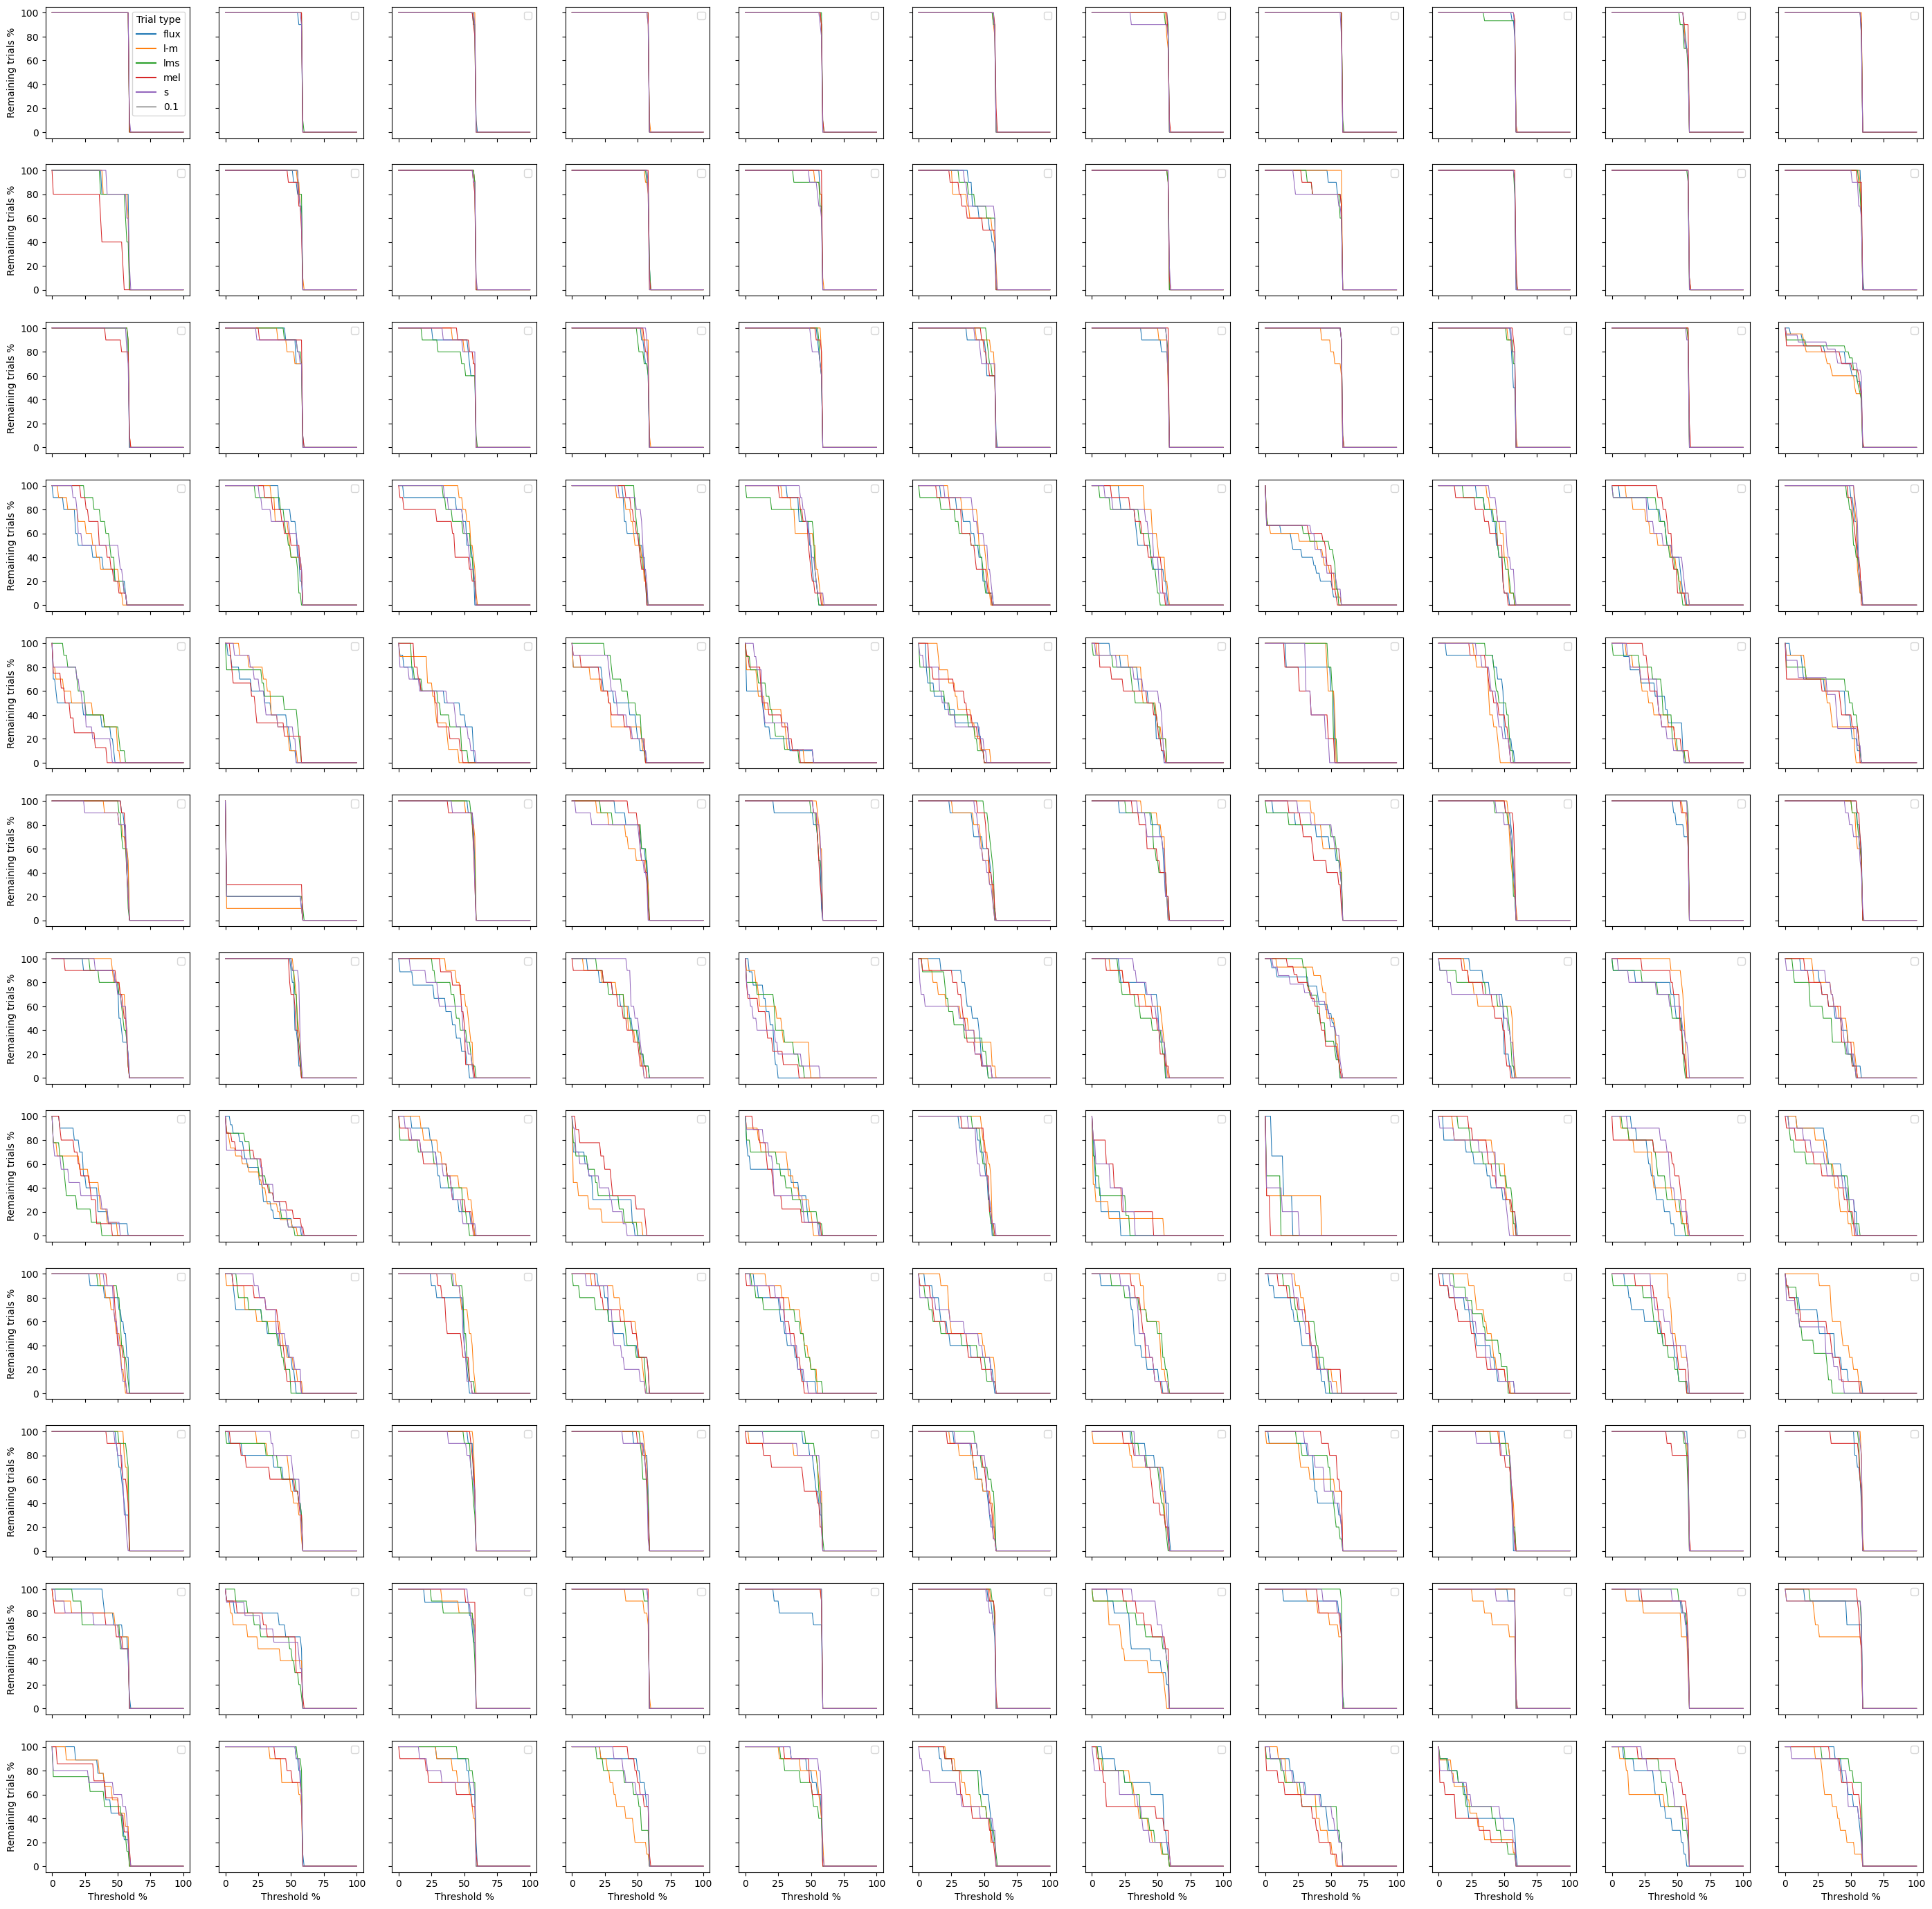

In [105]:
fig,axs = plt.subplots(12,11,figsize=(35,35),sharex=True,sharey=True)
for i,participant_id in enumerate(participant_list):
    participant_df = acceptance_threshold_dfs[str(participant_id)]
    for j,block in enumerate(np.arange(0,11)):
        block_df = participant_df[participant_df['Block']==block]
        sns.lineplot(data = block_df, x = 'Threshold %', y = 'Remaining trials %', ax = axs[i,j],hue='Trial type' ,size=0.1)
        if i!=0 or j!=0:
            axs[i,j].legend([])